# Interconnect Churn Rate Investigation: #

## Introduction: ##
The goal of the EDA is to gain insight into the data so as to create an effecitive working plan for model training and testing. Will determine the preprocessing steps that need to be taken to ensure conformity to standard python convention as well as optimal model training. After EDA (viewing data, general info/stats, are missing/duplicate values present) will formulate notes on the data and a working plan for model training, testing and evaluation. Then perform pre-processing (checking data types, merging all dataframes, dealing with missing/duplicate values, etc.) and esure the model is ready for training, testing and evaluation. 

**EDA implementation includes:**
- Loading data and creating dataframes. 
- Analysing the data structure within the dataframes as well as data type.
- Get a general statistical description for applicable data.
- Determining if missing/duplicate values are present.
- Preprocessing data for model training/testing.

## Exploratory Data Analysis: ##

In [1]:
#loading necessary libraries 
import os
import random
import sys
import lightgbm as lgb
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from catboost import CatBoostClassifier, Pool
from contextlib import contextmanager
from functools import reduce
from lightgbm import LGBMClassifier
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier

In [2]:
#creating dataframes for each file 
contract_df = pd.read_csv("/Users/micha/Downloads/final_provider/final_provider/contract.csv")
internet_df = pd.read_csv("/Users/micha/Downloads/final_provider/final_provider/internet.csv")
personal_df = pd.read_csv("/Users/micha/Downloads/final_provider/final_provider/personal.csv")
phone_df = pd.read_csv("/Users/micha/Downloads/final_provider/final_provider/phone.csv")

In [3]:
#creating a 'dfs' dictionary for easier analysis 

dfs = {
    'contract_df': contract_df, 
    'internet_df': internet_df, 
    'personal_df': personal_df,
    'phone_df': phone_df
}
#printing the first few rows from each dataframe to get a general overview of the data 
for name, df in zip(dfs.keys(), dfs.values()):
    print(f'\n**{name}:**\n')
    print(df.head(3))


**contract_df:**

   customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   

  PaperlessBilling     PaymentMethod  MonthlyCharges TotalCharges  
0              Yes  Electronic check           29.85        29.85  
1               No      Mailed check           56.95       1889.5  
2              Yes      Mailed check           53.85       108.15  

**internet_df:**

   customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0  7590-VHVEG             DSL             No          Yes               No   
1  5575-GNVDE             DSL            Yes           No              Yes   
2  3668-QPYBK             DSL            Yes          Yes               No   

  TechSupport StreamingTV StreamingMovies  
0          No          No              No  
1          No          N

In [4]:
#printing the general info for each df 
for name, df in zip(dfs.keys(), dfs.values()):
    print(f'\n**{name}:**\n')
    df.info()


**contract_df:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB

**internet_df:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   obj

In [5]:
#general description for each df 
for name, df in zip(dfs.keys(), dfs.values()):
    print(f'\n**{name}:**\n')
    print(df.describe())


**contract_df:**

       MonthlyCharges
count     7043.000000
mean        64.761692
std         30.090047
min         18.250000
25%         35.500000
50%         70.350000
75%         89.850000
max        118.750000

**internet_df:**

        customerID InternetService OnlineSecurity OnlineBackup  \
count         5517            5517           5517         5517   
unique        5517               2              2            2   
top     7590-VHVEG     Fiber optic             No           No   
freq             1            3096           3498         3088   

       DeviceProtection TechSupport StreamingTV StreamingMovies  
count              5517        5517        5517            5517  
unique                2           2           2               2  
top                  No          No          No              No  
freq               3095        3473        2810            2785  

**personal_df:**

       SeniorCitizen
count    7043.000000
mean        0.162147
std         0.368612


In [6]:
for name, df in zip(dfs.keys(), dfs.values()):
    print(f'\n**{name}:**\n')
    print(df.isna().sum())


**contract_df:**

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

**internet_df:**

customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

**personal_df:**

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

**phone_df:**

customerID       0
MultipleLines    0
dtype: int64


In [7]:
for name, df in zip(dfs.keys(), dfs.values()):
    print(f'\n**{name}:**\n')
    print(df.duplicated(subset=['customerID']).sum())


**contract_df:**

0

**internet_df:**

0

**personal_df:**

0

**phone_df:**

0


## Notes on Data Information (by dataframe): ##

**General Notes:**
- Created several dataframes to store and view all customer info easier.
- Need to correct column name format for all dataframes to snake_case convention.
- Each customer has a unique ID present in all dataframes. 
- There are no apparent missing or duplicate values for any of the dataframes we created.

**Contract DataFrame:**
- Holds all contract info: including start of contract and whether or not they've terminated their contract
- Includes payment and billing info.
- The date columns (begin/end) need to be converted to datetime format.
- Data is unbalanced (73% of client's still with Interconnect)

**Internet DataFrame:**
- Contains the info on what internet service a client uses.
- Holds all the info for whether or not a client makes use of other online services offered like; malicious web-site blocker (OnlineSecurity), antivirus software (OnlineSecurity) and cloud-storage/data backup (OnlineBackup)
- Shows if a client has used technical support (TechSupport) or made use of companies streaming services (StreamingTV, StreamingMovies)

**Personal DataFrame:**
- Contains client's personal info (age, gender, etc.)

**Phone DataFrame:**
- Shows info on telephone services namely if a client has more than one line with Interconnect

## Next Steps: ##
The steps following this general data overview includes:
1) Data Preprocessing:
    - Merging all dataframes together into one unified dataframe.
    - Ensuring that columns are converted to correct data type (Date columns to datetime, numeric columns to integer)
    - Checking missing, duplicate values are not present after the split, if present handle them accordingly.
    - Standardising categorical values (Yes/No, 0/1, etc.)
2) Generate desciptive statistics for numerical/categorical features.
3) Perform class balance, univariate (distributions of numerical features, frequency of categorical features) and bivariate analysis (explore relationships between features and target).
4) Feature Engineering.
5) Visualisations of key insights (time based, service usage, demographic analysis).
6) Develop final work plan for model training. 

## Data Preprocessing, Deeper EDA and Feature Engineering: ##

In [8]:
#merging the dataframes together 
dfs = [contract_df, internet_df, personal_df, phone_df]

interconnect_merged = reduce(lambda left, right: pd.merge(left, right, on='customerID', how='outer'), dfs)
interconnect_merged.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,0002-ORFBO,2019-05-01,No,One year,Yes,Mailed check,65.6,593.3,DSL,No,Yes,No,Yes,Yes,No,Female,0,Yes,Yes,No
1,0003-MKNFE,2019-05-01,No,Month-to-month,No,Mailed check,59.9,542.4,DSL,No,No,No,No,No,Yes,Male,0,No,No,Yes
2,0004-TLHLJ,2019-09-01,2020-01-01 00:00:00,Month-to-month,Yes,Electronic check,73.9,280.85,Fiber optic,No,No,Yes,No,No,No,Male,0,No,No,No
3,0011-IGKFF,2018-12-01,2020-01-01 00:00:00,Month-to-month,Yes,Electronic check,98.0,1237.85,Fiber optic,No,Yes,Yes,No,Yes,Yes,Male,1,Yes,No,No
4,0013-EXCHZ,2019-09-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,83.9,267.4,Fiber optic,No,No,No,Yes,Yes,No,Female,1,Yes,No,No


In [9]:
interconnect_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   InternetService   5517 non-null   object 
 9   OnlineSecurity    5517 non-null   object 
 10  OnlineBackup      5517 non-null   object 
 11  DeviceProtection  5517 non-null   object 
 12  TechSupport       5517 non-null   object 
 13  StreamingTV       5517 non-null   object 
 14  StreamingMovies   5517 non-null   object 
 15  gender            7043 non-null   object 
 16  SeniorCitizen     7043 non-null   int64  


**CONCLUSIONS ON MERGED DATAFRAME:**

After merging the data into one dataframe and checking the general info can gain some new insight into the data:
- Not all columns have a max value of 7043, these columns include optional services offered by Interconnect such as: internet service (Wifi), cyber security, multiple phone lines, etc. 
- These missing values indicate that a large portion of Interconnect's clients are not enrolled in these services and this may be a contributing factor to churn rate. Further analysis needed. 
- Nearly all column names are in CamelCase format and need to be converted to snake_case.
- Several columns have incorrect datatypes (BeginDate, EndDate, TotalCharges) and need to be converted to correct datatypes.

### Standardising Categorical Data/Converting Data Types:

In [10]:
#standardising binary cols with 0/1 format 
binary_cols = ['PaperlessBilling', 'gender', 'Partner', 'Dependents']
for col in binary_cols:
    print(f'\n{col}:')
    print(interconnect_merged[col].unique())


PaperlessBilling:
['Yes' 'No']

gender:
['Female' 'Male']

Partner:
['Yes' 'No']

Dependents:
['Yes' 'No']


In [11]:
interconnect_merged[binary_cols] = interconnect_merged[binary_cols].replace({'Female': 0, 'Male': 1, 'Yes': 1, 'No': 0})

#confirming the change 
for col in binary_cols:
    print(f'\n{col}:')
    print(interconnect_merged[col].unique())


PaperlessBilling:
[1 0]

gender:
[0 1]

Partner:
[1 0]

Dependents:
[1 0]


C:\Users\micha\AppData\Local\Temp\ipykernel_11968\2675096312.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  interconnect_merged[binary_cols] = interconnect_merged[binary_cols].replace({'Female': 0, 'Male': 1, 'Yes': 1, 'No': 0})


In [12]:
interconnect_merged['TotalCharges'] = pd.to_numeric(interconnect_merged['TotalCharges'], errors='coerce')
interconnect_merged['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.2 KB


In [13]:
interconnect_merged.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,0002-ORFBO,2019-05-01,No,One year,1,Mailed check,65.6,593.30,DSL,No,Yes,No,Yes,Yes,No,0,0,1,1,No
1,0003-MKNFE,2019-05-01,No,Month-to-month,0,Mailed check,59.9,542.40,DSL,No,No,No,No,No,Yes,1,0,0,0,Yes
2,0004-TLHLJ,2019-09-01,2020-01-01 00:00:00,Month-to-month,1,Electronic check,73.9,280.85,Fiber optic,No,No,Yes,No,No,No,1,0,0,0,No
3,0011-IGKFF,2018-12-01,2020-01-01 00:00:00,Month-to-month,1,Electronic check,98.0,1237.85,Fiber optic,No,Yes,Yes,No,Yes,Yes,1,1,1,0,No
4,0013-EXCHZ,2019-09-01,2019-12-01 00:00:00,Month-to-month,1,Mailed check,83.9,267.40,Fiber optic,No,No,No,Yes,Yes,No,0,1,1,0,No


In [14]:
interconnect_merged['BeginDate'] = pd.to_datetime(interconnect_merged['BeginDate'])
interconnect_merged['EndDate'] = pd.to_datetime(interconnect_merged['EndDate'].replace('No', pd.NaT), errors='coerce')
interconnect_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   int64         
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   InternetService   5517 non-null   object        
 9   OnlineSecurity    5517 non-null   object        
 10  OnlineBackup      5517 non-null   object        
 11  DeviceProtection  5517 non-null   object        
 12  TechSupport       5517 non-null   object        
 13  StreamingTV       5517 non-null   object        
 14  StreamingMovies   5517 n

**STANDARDISED CATEGORICAL VALUES AND DATA TYPE CONVERSION CONCLUSIONS:**
- Converted binary categorical features to a 0 and 1 format; converted 'Yes'/'No' columns ('Partner', 'SeniorCitizen', 'Dependents') with value 1 indicating 'Yes' and 0 indicating 'No'.
- Converted the 'gender' columns values from 'Male' and 'Female' to 0/1 where 0 = 'Female' and 'Male' = 1. 
- Converted the 'TotalCharges' column to float datatype from object (string) datatype.
- Converted the 'BeginDate' and 'EndDate' columns to datetime64 and replaced 'No' in 'EndDate' with 'NaT' (missing time value) as 'No' in this case indicates that the client is still enrolled with Interconnect's services and an end date is only present after a client terminates a contract. This does however create missing values that may need to be addressed later on. 
- Categorical features that also have missing values well be dealt with later after missing values have been addressed.

### Checking Missing/Duplicate Values After Merge: 

In [15]:
interconnect_merged.isna().sum()

customerID             0
BeginDate              0
EndDate             5174
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges          11
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
MultipleLines        682
dtype: int64

In [16]:
#filling in missing values with 'NoService' indicating that client is ineligble for Yes/No analysis 
missing_val_cols = [
    'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 
    'StreamingMovies', 'MultipleLines'
]
interconnect_merged[missing_val_cols] = interconnect_merged[missing_val_cols].fillna('NoService')
interconnect_merged.sample(5)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
4977,6999-CHVCF,2014-06-01,NaT,Two year,1,Bank transfer (automatic),102.10,7149.35,Fiber optic,Yes,Yes,Yes,No,No,Yes,1,0,0,0,Yes
6724,9548-LIGTA,2015-01-01,NaT,Two year,1,Mailed check,81.05,4747.65,DSL,Yes,Yes,No,Yes,Yes,Yes,1,0,1,0,No
5710,8043-PNYSD,2014-11-01,NaT,Two year,0,Mailed check,19.55,1245.60,NoService,NoService,NoService,NoService,NoService,NoService,NoService,1,0,1,1,No
1735,2523-EWWZL,2017-11-01,NaT,Month-to-month,1,Electronic check,76.10,2093.40,Fiber optic,No,Yes,No,No,No,No,0,0,1,0,No
4003,5649-ANRML,2019-11-01,2020-01-01,Month-to-month,1,Credit card (automatic),95.10,180.25,Fiber optic,No,Yes,Yes,Yes,No,Yes,1,1,0,0,No


In [17]:
interconnect_merged.dropna(subset=['TotalCharges'], inplace=True)

In [18]:
interconnect_merged.isna().sum()

customerID             0
BeginDate              0
EndDate             5163
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
MultipleLines          0
dtype: int64

In [19]:
interconnect_merged.duplicated(subset=['customerID']).sum()

np.int64(0)

**CONCLUSIONS ON MISSING/DUPLICATE VALUES POST MERGE:**
- After checking missing values we can see 'EndDate' has over 5000 missing values; however this is resultant of our conversion to 'datetime64' the missing values here indicate that the client is still enrolled with the company. 
- The other columns with missing values are: InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies and MultipleLines here missing values indicate that a client is not enrolled with one or more of Interconnect's services in addition to phone services and were filled in with 'NoService' an accurate descriptor for those without one or more of these services. This also shows which clients can be ruled out when analysing these services in relation to churn rate later on.
- The only other column with missing values is the 'TotalCharges' column however the amount is so small these missing values can be dropped outright and shouldn't affect overall analysis or model training. 
- There appear to be no duplicate values when using 'customerID' as the duplicate search condition. 


### Converting Columns Names to Snake Case: ###

In [20]:
interconnect_merged = interconnect_merged.rename(
    columns={
        'customerID': 'customer_id',
        'BeginDate': 'begin_date',
        'EndDate': 'end_date',
        'Type': 'type',
        'PaperlessBilling': 'paperless_billing',
        'PaymentMethod': 'payment_method',
        'MonthlyCharges': 'monthly_charges',
        'TotalCharges': 'total_charges',
        'InternetService': 'internet_service',
        'OnlineSecurity': 'online_security',
        'OnlineBackup': 'online_backup',
        'DeviceProtection': 'device_protection',
        'TechSupport': 'tech_support',
        'StreamingTV': 'streaming_tv',
        'StreamingMovies': 'streaming_movies',
        'SeniorCitizen': 'senior_citizen',
        'Partner': 'partner',
        'Dependents': 'dependents',
        'MultipleLines': 'multiple_lines'
    }
)
interconnect_merged.head(1)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines
0,0002-ORFBO,2019-05-01,NaT,One year,1,Mailed check,65.6,593.3,DSL,No,Yes,No,Yes,Yes,No,0,0,1,1,No


### Numerical/Categoral Descriptive Stats: 

In [21]:
#creating seperate numeric and categorical feature dataframes for easier analysis 
numerical_cols = interconnect_merged[['monthly_charges', 'total_charges']]
categorical_cols = interconnect_merged.drop(columns=[
    'customer_id', 'begin_date', 'end_date', 'type', 'payment_method', 'monthly_charges', 'total_charges', 'internet_service'
], axis=1)

In [22]:
#getting statistical description for numerical columns 
numerical_cols.describe()

,monthly_charges,total_charges
count,7032.000000,7032.000000
mean,64.798208,2283.300441
std,30.085974,2266.771362
min,18.250000,18.800000
25%,35.587500,401.450000
50%,70.350000,1397.475000
75%,89.862500,3794.737500
max,118.750000,8684.800000


In [23]:
#writing custom function for analysing categorical features and proportion of users in each category 
def categorical_summary(df):
    summaries = {}

    for col in df.columns:
        summaries[col] = (
            df[col].value_counts().to_frame('count').assign(proportion=lambda x: x['count'] / x['count'].sum())
        )
    
    return summaries

cat_summaries = categorical_summary(categorical_cols)

for feature, df_feature in cat_summaries.items():
    print(f'\nFeature: {feature}')
    print(df_feature)


Feature: paperless_billing
                   count  proportion
paperless_billing                   
1                   4168    0.592719
0                   2864    0.407281

Feature: online_security
                 count  proportion
online_security                   
No                3497    0.497298
Yes               2015    0.286547
NoService         1520    0.216155

Feature: online_backup
               count  proportion
online_backup                   
No              3087    0.438993
Yes             2425    0.344852
NoService       1520    0.216155

Feature: device_protection
                   count  proportion
device_protection                   
No                  3094    0.439989
Yes                 2418    0.343857
NoService           1520    0.216155

Feature: tech_support
              count  proportion
tech_support                   
No             3472    0.493743
Yes            2040    0.290102
NoService      1520    0.216155

Feature: streaming_tv
              c

**CONCLUSIONS ON NUMERICAL/CATEGORICAL DESCRIPTIVE STATS:**

***Numerical Features:***

- Can see from numerical features statistical descriptions that the pay range for each varies in scale (most likely due to how many services a client is enrolled in at a time).
- The average monthly charges is around $65 and average total charges are around $2200.
- The minmimum value for both is around $18 dollars the max value for monthly charges is around $119 and the max value for total charges is near $8700.
- A reasonable assumption is that a higher monthly charge is the result of being enrolled in multiple services offered by Interconnect and may result in higher churn rates but further analysis is required to test this assumption. 
- It is harder to make assumptions around total charges as this may be skewed by tenure (length of time with service) or amount of services a customer is enrolled in at a given time. 

***Categorical Features:***

- After analysing the categorical features (Gender, dependents, etc.) can see that in terms of Gender the data is fairly balanced around 50/50
- Only around 16% of users are senior citizens.
- A high number of users also have a partner (around 48%) most likely also enrolled in service with Interconnect.
- Only 30% of users have dependents (also likely enrolled with Interconnect).
- Relatively even split between client's with multiple phone line with 48 % not being enrolled, 42% are enrolled and 9% are not with either service (likely this 9% are users of Interconnect's other services: internet, cybersecurity, etc.)

### Class Balance: ###

% of Clients still with company: 0.7342150170648464


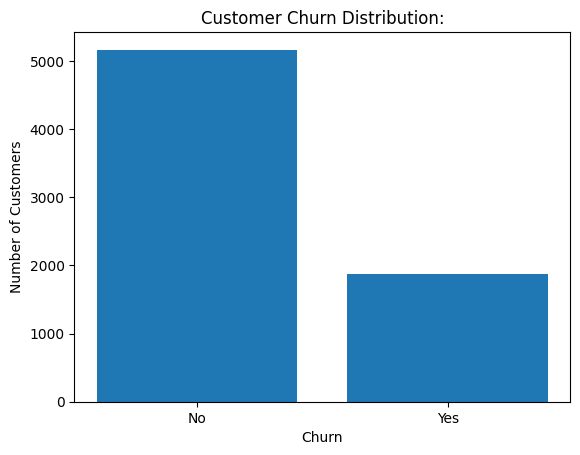

In [24]:
#visualising churn distribution
interconnect_merged['churn'] = np.where(interconnect_merged['end_date'].isna(), 'No', 'Yes')
counts = interconnect_merged['churn'].value_counts()
print(f'% of Clients still with company: {len(interconnect_merged[interconnect_merged['churn'] == 'No']) / len(interconnect_merged['churn'])}')

plt.bar(counts.index, counts.values)
plt.title('Customer Churn Distribution:')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')

plt.show()

In [25]:
#converting 'Yes'/'No' format to 0/1 for 'churn' column 
interconnect_merged['churn'] = interconnect_merged['churn'].replace({'Yes': 1, 'No': 0})
interconnect_merged['churn'].unique()

C:\Users\micha\AppData\Local\Temp\ipykernel_11968\163984802.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  interconnect_merged['churn'] = interconnect_merged['churn'].replace({'Yes': 1, 'No': 0})


array([0, 1])

**CONCLUSIONS ON CLASS BALANCE:**
- The target variable (Churn) is not balanced around 73% of users are still enrolled with Interconnect's services.
- This is good news for the company (high retention rate) and will also influence model selection and training pipline later on. 

### Univariate Analysis (Numerical Features): ###

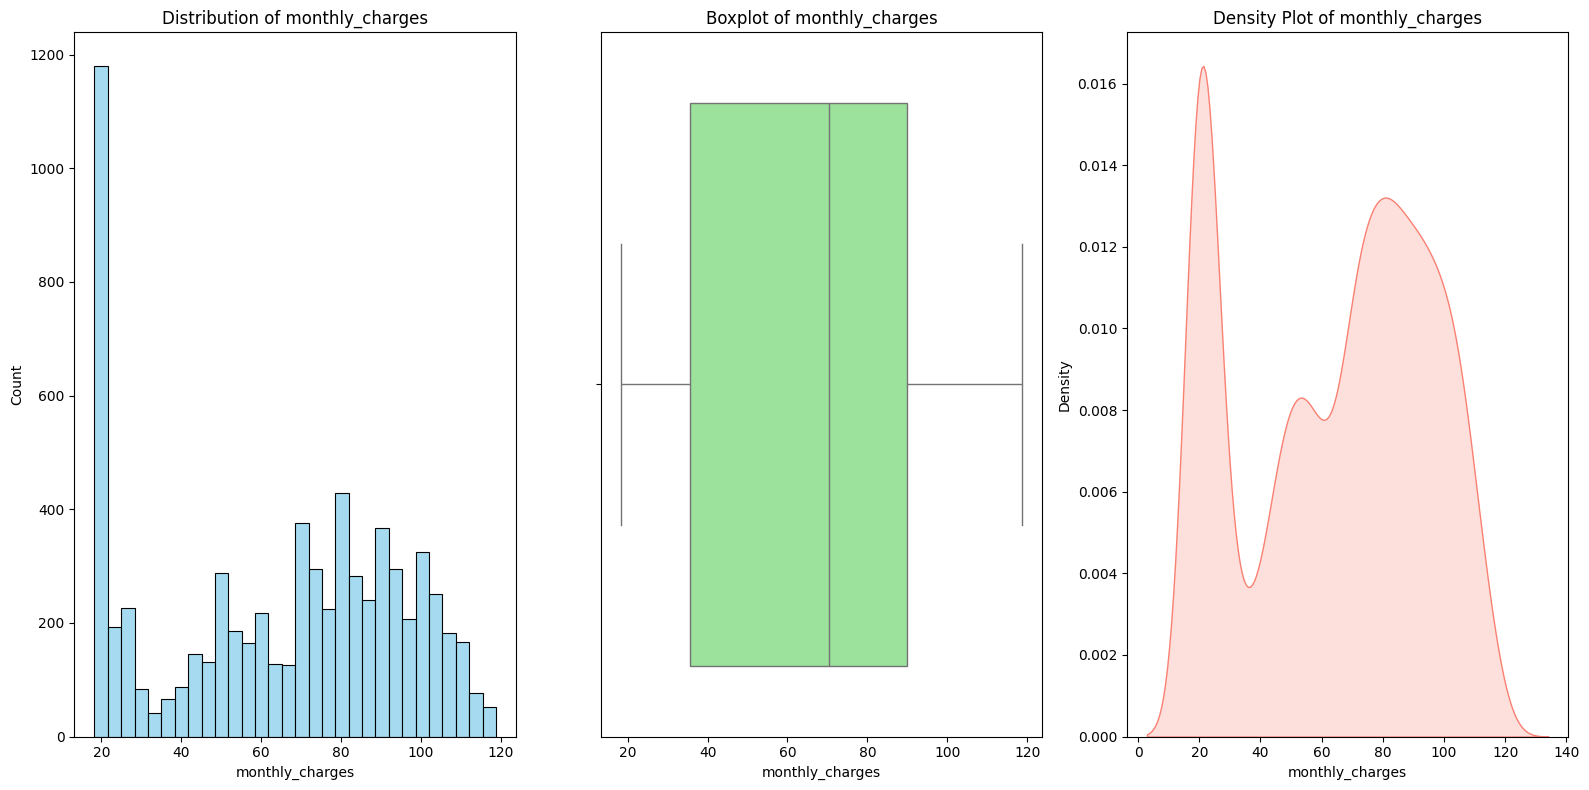

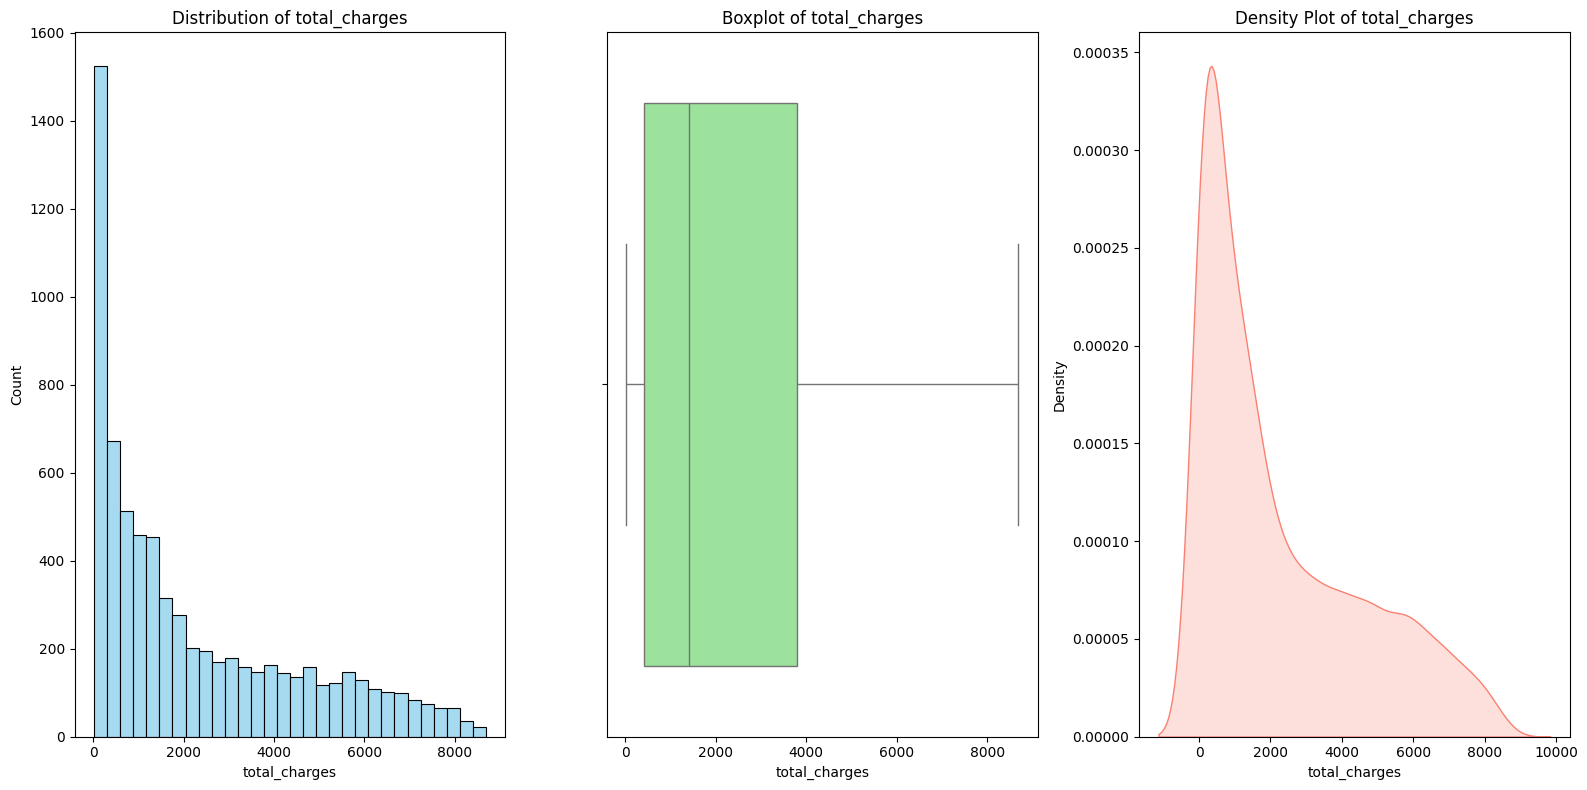

In [26]:
for col in numerical_cols:
    plt.figure(figsize=(16, 8))

    #histogram 
    plt.subplot(1, 3, 1)
    sns.histplot(numerical_cols[col], bins=30, kde=False, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    #boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=numerical_cols[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')

    #density plot 
    plt.subplot(1, 3, 3)
    sns.kdeplot(numerical_cols[col], fill=True, color='salmon')
    plt.title(f'Density Plot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()
    

**CONCLUSIONS ON UNIVARIATE NUMERICAL FEATURE ANALYSIS:**

***Monthly Charges:***
- Most commonly people are charged between $15 and $25 per month and can be assumed to be enrolled in one or few services.
- When looking at the boxplot showing distribution of monthly charges can see that the mean value is around $65 (also seen in our description of the data earlier).
- When viewing the density plot we can see that all though the highest density of people pay around $20 per month a large portion of client's pay around the average of $65 this average may be skewed by some of the more outliers with the highest values seen being around $120 per month.

***Total Charges:***
- When looking at the histogram of total charges we can see a similar trend to that of monthly charges with the most common values being <$2000 and gradually tapering off. This is another indicator that those with a lower monthly pay last longer with the service as over time they would be charged less in total. 
- The boxplot shows much the same with the average being close to $2000, although this is likely skewed by outliers as the max vlaue for total charges is over $8000.
- The density plot is a very close reflection to the histogram but shows that more people than expected pay more than the average and that total charges is a bit more evenly distributed than the histogram shows. 

### Univariate Analysis (Categorical Features): 

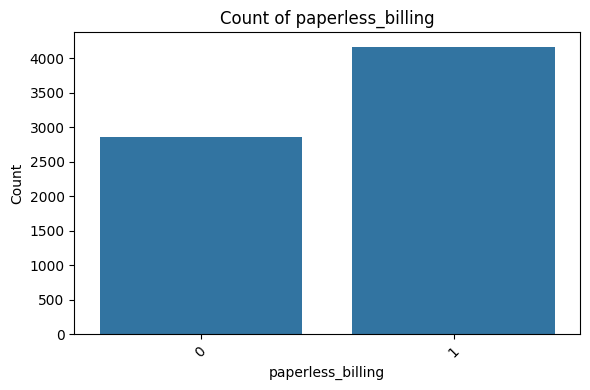

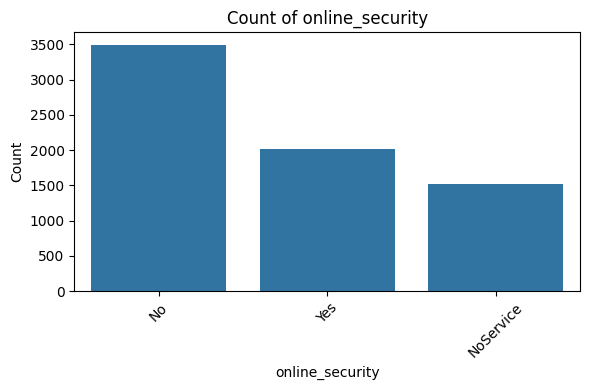

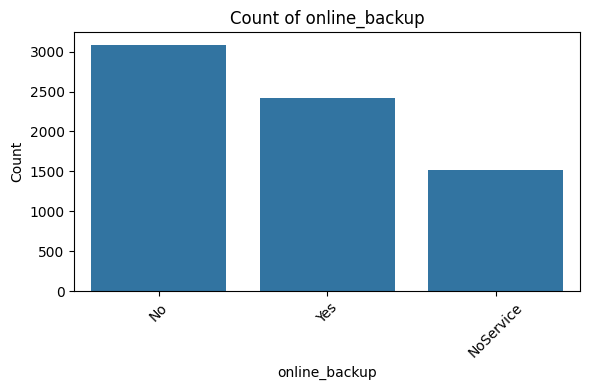

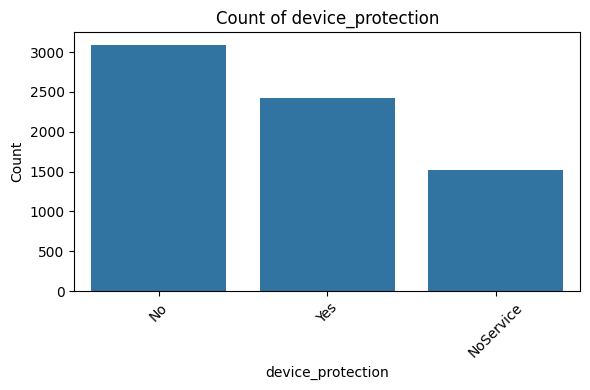

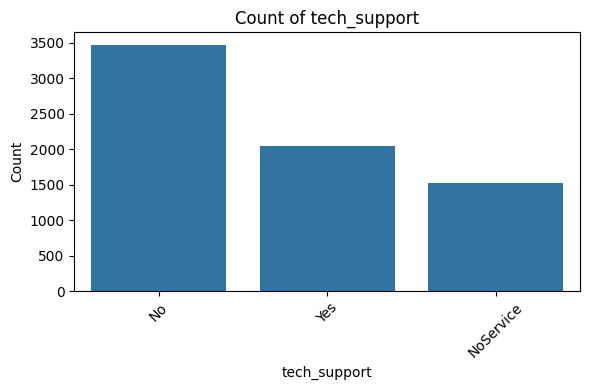

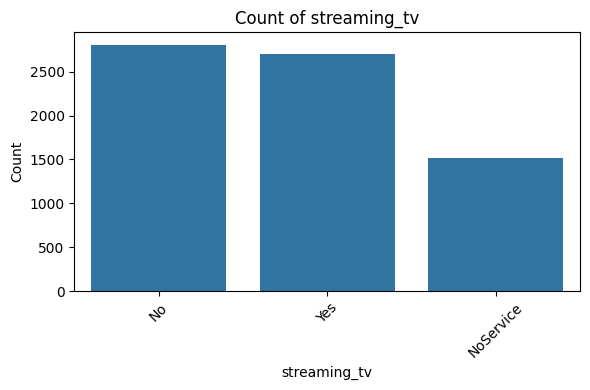

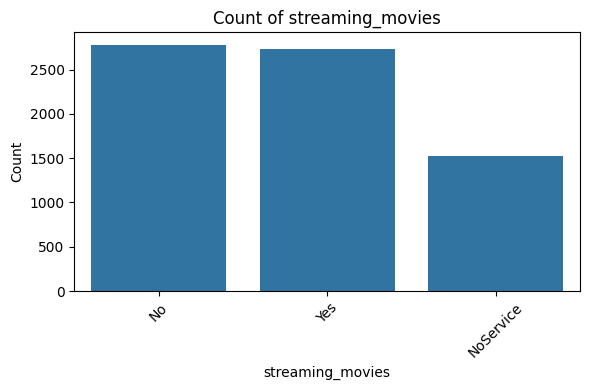

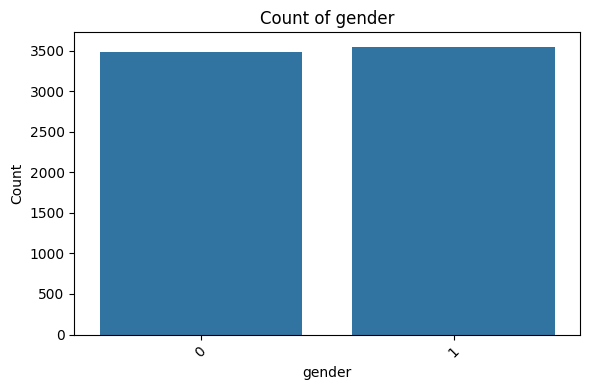

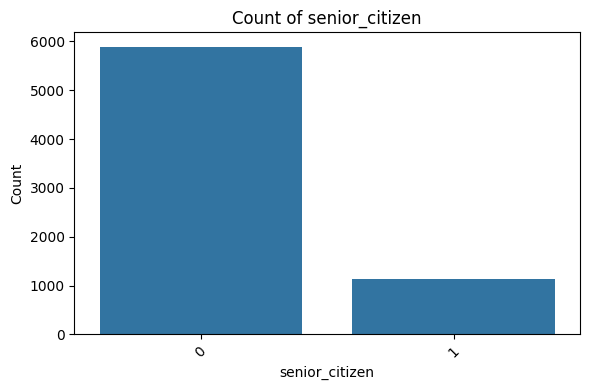

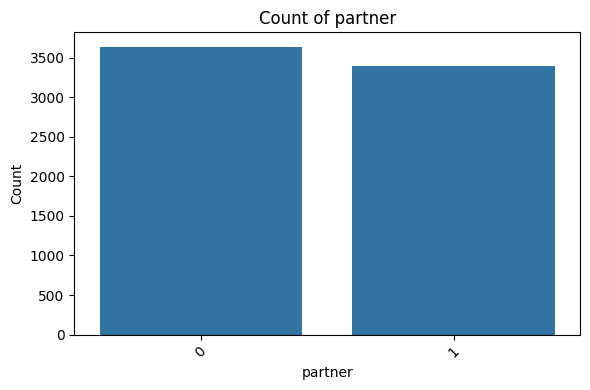

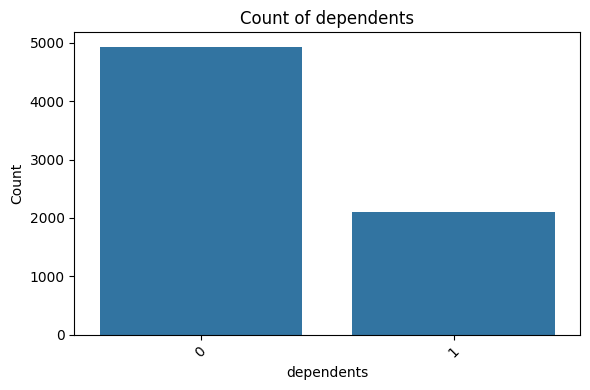

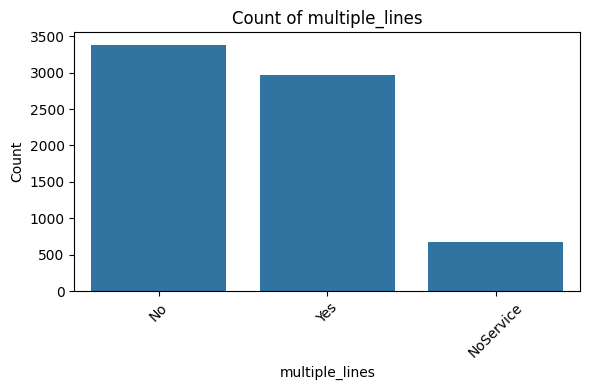

In [27]:
for feature, df_feature in cat_summaries.items():
    index = df_feature.index.name
    plot = df_feature.reset_index().rename(columns={index: 'category'})

    plt.figure(figsize=(6, 4))
    sns.barplot(x='category', y='count', data=plot)
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

**CONCLUSIONS FOR UNIVARIATE ANALYSIS OF CATEGORICAL FEATURES:**

- Majority of people are enrolled in paperless billing. 
- Most people are not enrolled in cyber security services or haven't been offered the service the same is true for cloud service, antivirus, online security and tech support usage. (The fact that more customers are not utilising such essential services may contribute to churn rate; further analysis needed)
- People who make use of the streaming services (movies/TV) and multiple phone line service is marginally different between those enrolled and those not enrolled. 
- Majority of Interconnect's clients are not senior citizens. 
- There are far fewer people with dependents enrolled in Interconnect's services. 
- The ratio of people with partners enrolled in the service is almost 50/50. 
- Further analysis is needed to determine which exactly of these categorical features contribute most to churn rate. 

### Bivariate Analysis (Numerical Features): ###


Churn vs monthly_charges Statistical Description:

        count       mean        std    min    25%    50%     75%     max
churn                                                                   
0      5163.0  61.307408  31.094557  18.25  25.10  64.45  88.475  118.75
1      1869.0  74.441332  24.666053  18.85  56.15  79.65  94.200  118.35


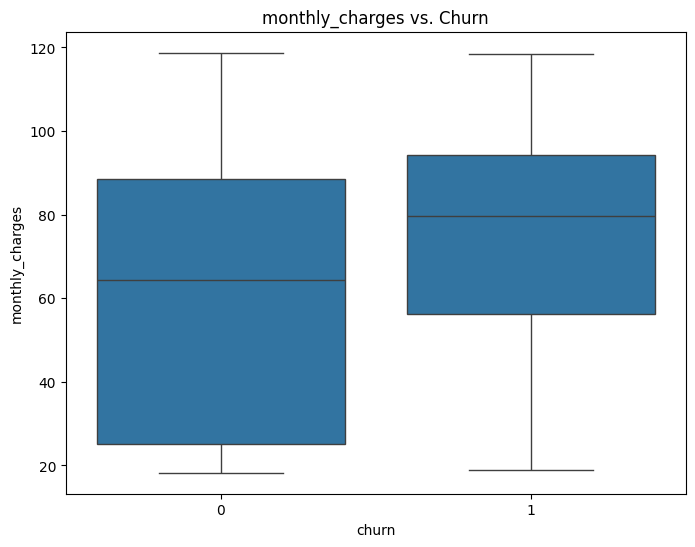

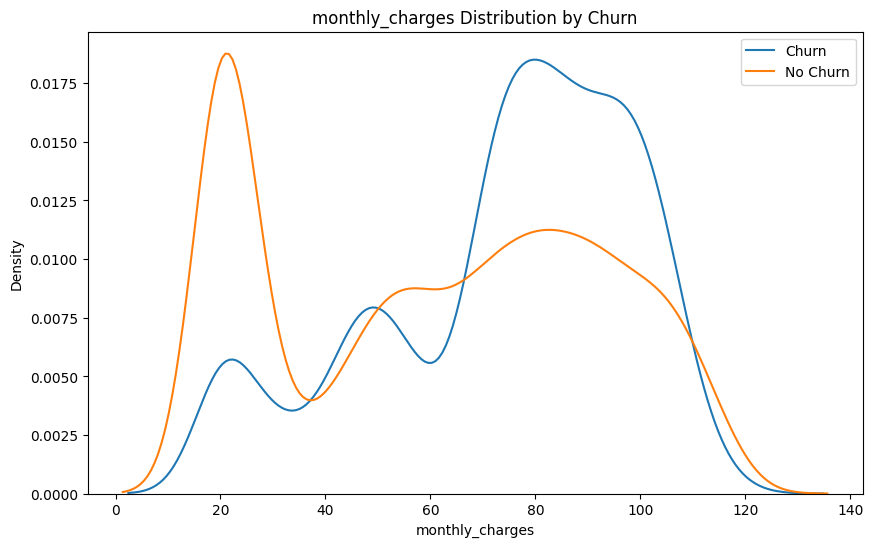


Churn vs total_charges Statistical Description:

        count         mean          std    min      25%      50%       75%  \
churn                                                                        
0      5163.0  2555.344141  2329.456984  18.80  577.825  1683.60  4264.125   
1      1869.0  1531.796094  1890.822994  18.85  134.500   703.55  2331.300   

           max  
churn           
0      8672.45  
1      8684.80  


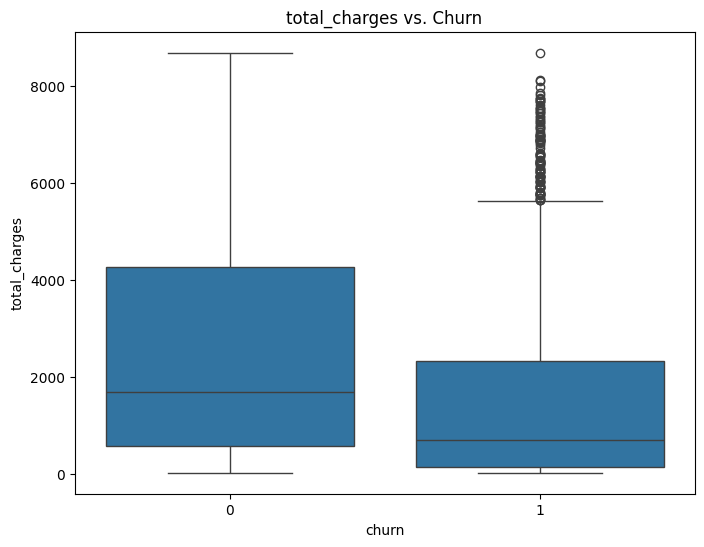

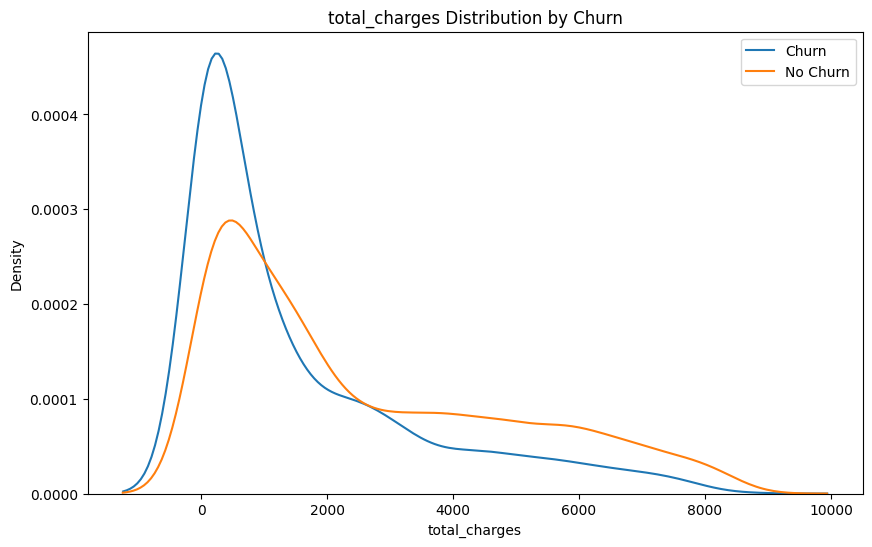

In [28]:
for col in numerical_cols:
    print(f'\nChurn vs {col} Statistical Description:\n')
    print(interconnect_merged.groupby('churn')[col].describe())

    #creating a boxplot for comparison
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='churn', y=col, data=interconnect_merged)
    plt.title(f'{col} vs. Churn')
    plt.show()

    #creating density plot (distribution comparison)
    plt.figure(figsize=(10, 6))
    sns.kdeplot(interconnect_merged[interconnect_merged['churn']==1][col], label='Churn')
    sns.kdeplot(interconnect_merged[interconnect_merged['churn']==0][col], label='No Churn')
    plt.title(f'{col} Distribution by Churn')
    plt.legend()
    plt.show()

**CONCLUSIONS FOR BIVARIATE ANALYSIS OF NUMERICAL FEATURES IN RELATION TO CHURN:**

***Monthly Charges:***
- The box plot and density plot both confirm the assumption that client's with a higher average monthly charge are more likely to churn. 
- The majority of churners from the 25-75% pay more than those who don't churn from Interconnect's services.

***Total Charges:***
- The total charges box plot and density plots are a little more vague and actually indicate that the majority of churners are most dense in the <$2000 range 
- However when compared with monthly charges this is likely because they are leaving the service faster than those enrolled who pay less per month and this may contribute to why churners pay less in total but more per month.
- The box plot also indicates there are some extreme outliers in the total charges data which is backed up by earlier analysis. 

### Bivariate Analysis (Categorical Features): 


Churn Rate vs. paperless_billing

churn                 0     1
paperless_billing            
0                  83.6  16.4
1                  66.4  33.6


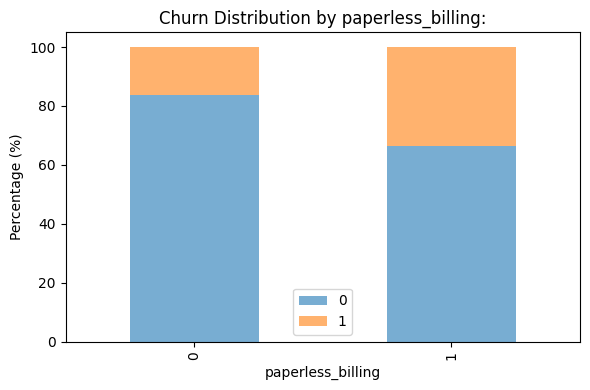


Churn Rate vs. online_security

churn               0     1
online_security            
No               58.2  41.8
NoService        92.6   7.4
Yes              85.4  14.6


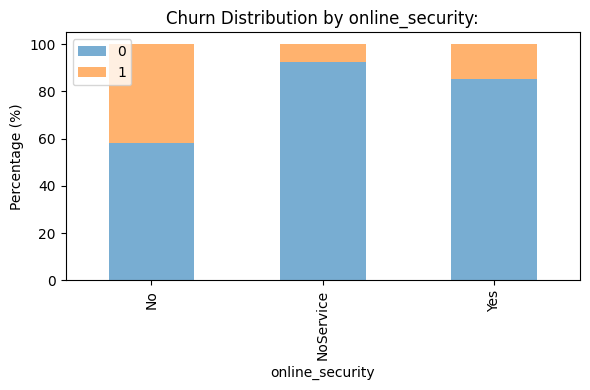


Churn Rate vs. online_backup

churn             0     1
online_backup            
No             60.1  39.9
NoService      92.6   7.4
Yes            78.4  21.6


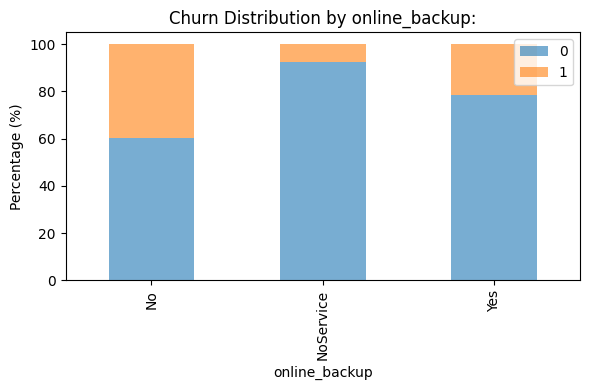


Churn Rate vs. device_protection

churn                 0     1
device_protection            
No                 60.9  39.1
NoService          92.6   7.4
Yes                77.5  22.5


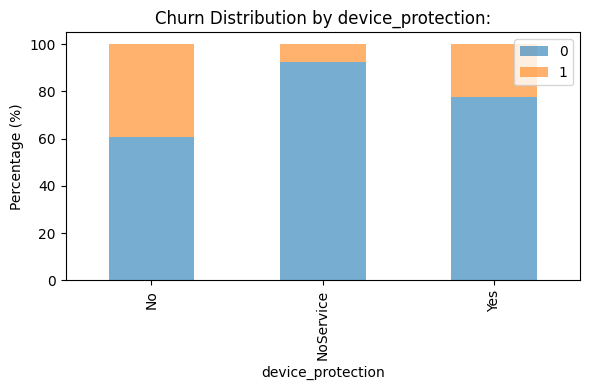


Churn Rate vs. tech_support

churn            0     1
tech_support            
No            58.4  41.6
NoService     92.6   7.4
Yes           84.8  15.2


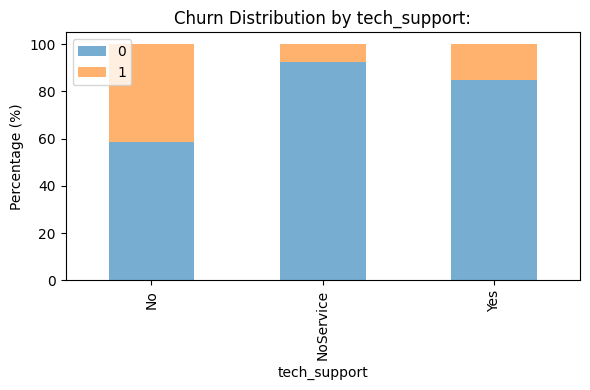


Churn Rate vs. streaming_tv

churn            0     1
streaming_tv            
No            66.5  33.5
NoService     92.6   7.4
Yes           69.9  30.1


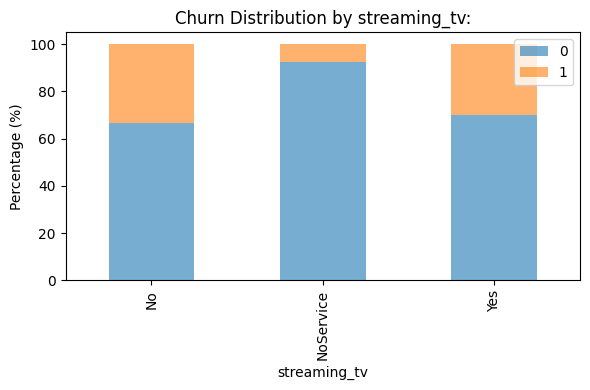


Churn Rate vs. streaming_movies

churn                0     1
streaming_movies            
No                66.3  33.7
NoService         92.6   7.4
Yes               70.0  30.0


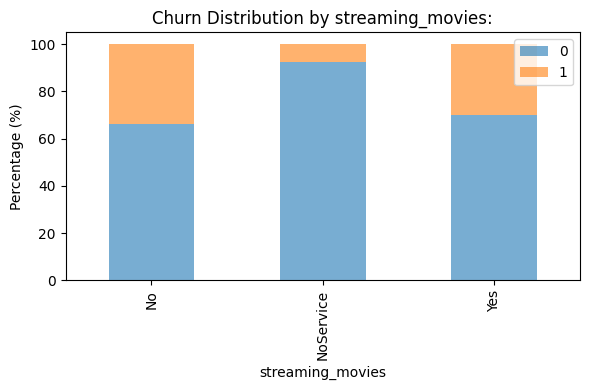


Churn Rate vs. gender

churn      0     1
gender            
0       73.0  27.0
1       73.8  26.2


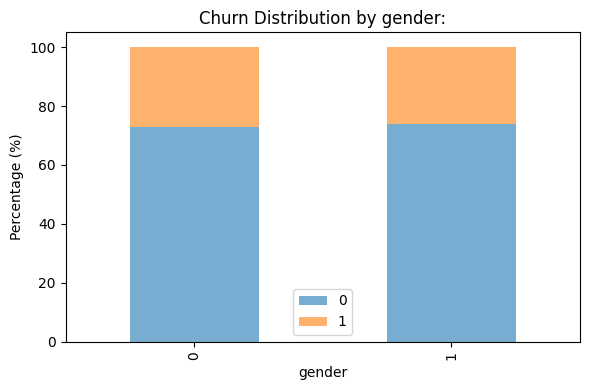


Churn Rate vs. senior_citizen

churn              0     1
senior_citizen            
0               76.3  23.7
1               58.3  41.7


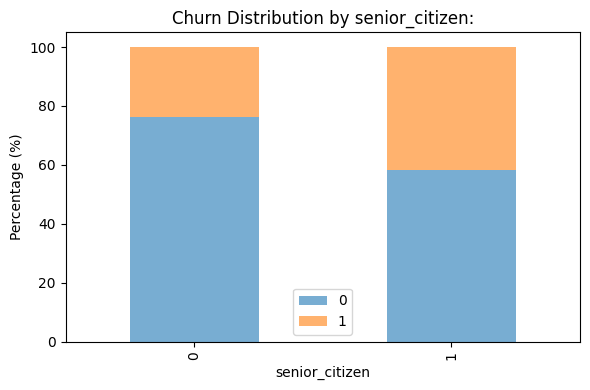


Churn Rate vs. partner

churn       0     1
partner            
0        67.0  33.0
1        80.3  19.7


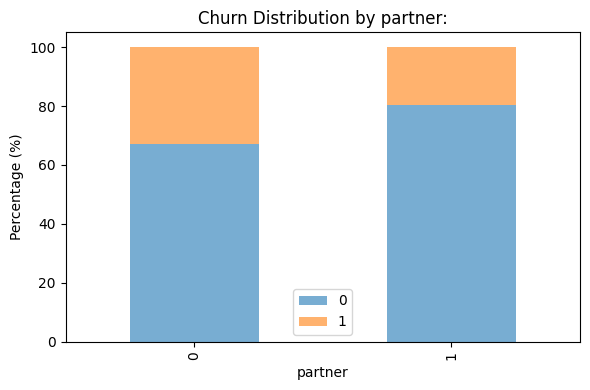


Churn Rate vs. dependents

churn          0     1
dependents            
0           68.7  31.3
1           84.5  15.5


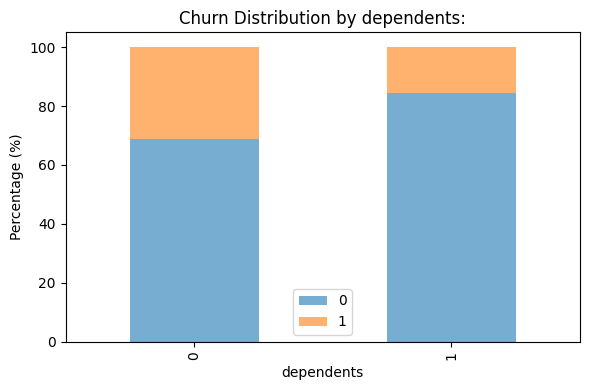


Churn Rate vs. multiple_lines

churn              0     1
multiple_lines            
No              74.9  25.1
NoService       75.0  25.0
Yes             71.4  28.6


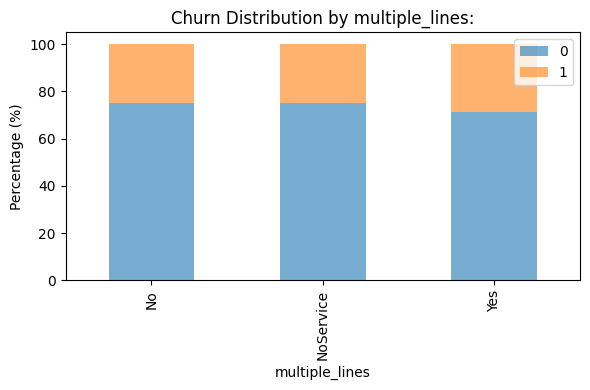

In [29]:
cat_features = [
    col for col in categorical_cols.columns if col != 'churn'
]
for feature in cat_features:
    churn_rate = pd.crosstab(
        interconnect_merged[feature],
        interconnect_merged['churn'],
        normalize='index'
    )

    churn_rate = (churn_rate * 100).round(1)

    print(f'\nChurn Rate vs. {feature}\n')
    print(churn_rate)

    churn_rate.plot(kind='bar', stacked=True, figsize=(6, 4), alpha=0.6)
    plt.title(f'Churn Distribution by {feature}:')
    plt.xlabel(feature)
    plt.ylabel('Percentage (%)')
    plt.legend()
    plt.tight_layout()
    plt.show()


**CONCLUSIONS ON CATEGORICAL FEATURES AND CORRELATION TO CHURN:**
- There is a higher churn rate for people who are not enrolled in internet/streaming services (online security, device protection, online back up, without counting 'NoService' as these client's were not offered or unaware of service making them inelligble for analysis). 
- This may indicate some dissatisfaction with the phone/internet service (One of Interconnect's main services) and more satisfaction and lesser likelyhood to churn when a client makes use Interconnect's additionaly services. 
- Perhaps the company should invest more heavily in bundled plans/better advertising additional services. 
- Senior citizens are more likely to churn from service than non-senior citizens this may indicate some usage issues that aren't connecting with older generations or lack of awareness of the dedicated tech-support line. (People who made use of tech-support less likely to churn).

### Feature Engineering: ###

In [30]:
print(f'{interconnect_merged['end_date'].unique()}\n')
print(interconnect_merged['begin_date'].unique())

<DatetimeArray>
[                'NaT', '2020-01-01 00:00:00', '2019-12-01 00:00:00',
 '2019-11-01 00:00:00', '2019-10-01 00:00:00']
Length: 5, dtype: datetime64[ns]

<DatetimeArray>
['2019-05-01 00:00:00', '2019-09-01 00:00:00', '2018-12-01 00:00:00',
 '2014-03-01 00:00:00', '2014-11-01 00:00:00', '2019-07-01 00:00:00',
 '2014-09-01 00:00:00', '2015-08-01 00:00:00', '2014-02-01 00:00:00',
 '2015-06-01 00:00:00', '2017-04-01 00:00:00', '2020-01-01 00:00:00',
 '2016-03-01 00:00:00', '2019-10-01 00:00:00', '2015-12-01 00:00:00',
 '2018-10-01 00:00:00', '2018-03-01 00:00:00', '2019-11-01 00:00:00',
 '2015-07-01 00:00:00', '2017-12-01 00:00:00', '2014-05-01 00:00:00',
 '2017-01-01 00:00:00', '2016-01-01 00:00:00', '2014-08-01 00:00:00',
 '2014-07-01 00:00:00', '2018-06-01 00:00:00', '2016-07-01 00:00:00',
 '2015-03-01 00:00:00', '2019-02-01 00:00:00', '2017-11-01 00:00:00',
 '2018-01-01 00:00:00', '2017-09-01 00:00:00', '2017-03-01 00:00:00',
 '2014-10-01 00:00:00', '2016-11-01 00:00:00', 

In [31]:
#adding a tenure column (no. of months as a customer)

#filling in missing values i.e. people still in service with the latest possible date in the dataset
observation_date = pd.Timestamp('2020-02-01')

interconnect_merged['tenure'] = interconnect_merged['end_date'].fillna(observation_date) - interconnect_merged['begin_date']
interconnect_merged['tenure_months'] = (interconnect_merged['tenure'].dt.days / 30).round(1)
interconnect_merged.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,...,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines,churn,tenure,tenure_months
0,0002-ORFBO,2019-05-01,NaT,One year,1,Mailed check,65.6,593.30,DSL,No,...,Yes,No,0,0,1,1,No,0,276 days,9.2
1,0003-MKNFE,2019-05-01,NaT,Month-to-month,0,Mailed check,59.9,542.40,DSL,No,...,No,Yes,1,0,0,0,Yes,0,276 days,9.2
2,0004-TLHLJ,2019-09-01,2020-01-01,Month-to-month,1,Electronic check,73.9,280.85,Fiber optic,No,...,No,No,1,0,0,0,No,1,122 days,4.1
3,0011-IGKFF,2018-12-01,2020-01-01,Month-to-month,1,Electronic check,98.0,1237.85,Fiber optic,No,...,Yes,Yes,1,1,1,0,No,1,396 days,13.2
4,0013-EXCHZ,2019-09-01,2019-12-01,Month-to-month,1,Mailed check,83.9,267.40,Fiber optic,No,...,Yes,No,0,1,1,0,No,1,91 days,3.0


In [32]:
ohe_cols = [
    'type', 'payment_method', 'internet_service',
    'online_security', 'online_backup', 'device_protection',
    'tech_support', 'streaming_tv', 'streaming_movies', 
    'multiple_lines'
]
for col in ohe_cols:
    print(f'\n{col}:')
    print(interconnect_merged[col].unique())


type:
['One year' 'Month-to-month' 'Two year']

payment_method:
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']

internet_service:
['DSL' 'Fiber optic' 'NoService']

online_security:
['No' 'Yes' 'NoService']

online_backup:
['Yes' 'No' 'NoService']

device_protection:
['No' 'Yes' 'NoService']

tech_support:
['Yes' 'No' 'NoService']

streaming_tv:
['Yes' 'No' 'NoService']

streaming_movies:
['No' 'Yes' 'NoService']

multiple_lines:
['No' 'Yes' 'NoService']


In [33]:
#one-hot encoding for model training 
x = interconnect_merged.drop(columns=['churn'])
target = interconnect_merged['churn']
interconnect_encoded = pd.get_dummies(x, columns=ohe_cols, drop_first=True)
interconnect_encoded.head(3)

,customer_id,begin_date,end_date,paperless_billing,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,...,device_protection_NoService,device_protection_Yes,tech_support_NoService,tech_support_Yes,streaming_tv_NoService,streaming_tv_Yes,streaming_movies_NoService,streaming_movies_Yes,multiple_lines_NoService,multiple_lines_Yes
0,0002-ORFBO,2019-05-01,NaT,1,65.6,593.30,0,0,1,1,...,False,False,False,True,False,True,False,False,False,False
1,0003-MKNFE,2019-05-01,NaT,0,59.9,542.40,1,0,0,0,...,False,False,False,False,False,False,False,True,False,True
2,0004-TLHLJ,2019-09-01,2020-01-01,1,73.9,280.85,1,0,0,0,...,False,True,False,False,False,False,False,False,False,False


In [34]:
interconnect_encoded.isna().sum()

customer_id                                  0
begin_date                                   0
end_date                                  5163
paperless_billing                            0
monthly_charges                              0
total_charges                                0
gender                                       0
senior_citizen                               0
partner                                      0
dependents                                   0
tenure                                       0
tenure_months                                0
type_One year                                0
type_Two year                                0
payment_method_Credit card (automatic)       0
payment_method_Electronic check              0
payment_method_Mailed check                  0
internet_service_Fiber optic                 0
internet_service_NoService                   0
online_security_NoService                    0
online_security_Yes                          0
online_backup

In [35]:
interconnect_encoded.duplicated().sum()

np.int64(0)

**CONCLUSIONS ON FEATURE ENGINEERING:**
- Calculated the amount of days and months each client has spent enrolled with Interconnect's service for those who are currently enrolled and haven't churned out opted to assign the last available date in the dataset as the "end" of their enrollment. (missing values in the 'end_date' column).
- This makes analysis easy to tell if a client is still enrolled if the day their contract "ends" happens to '2020-02-01 (last available date in dataset found in 'begin_date') you can tell they are still with the company. Any other date besides this one indicates a client who actually left. Know that this is a safe date to use as the closest known date of client churning prior to editing the 'end_date' column is '2020-01-01' the month before the last date that new client's enrolled ('begin_date').
- Performed OHE on categorical features that are not explicitly binary (they have a 'NoService' filled missing value) for model training down the line. 

### Time-Based/Service Usage Analysis and Customer Demographics:

C:\Users\micha\AppData\Local\Temp\ipykernel_11968\2399765293.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  interconnect_merged.groupby('tenure_bin')['churn'].mean() * 100


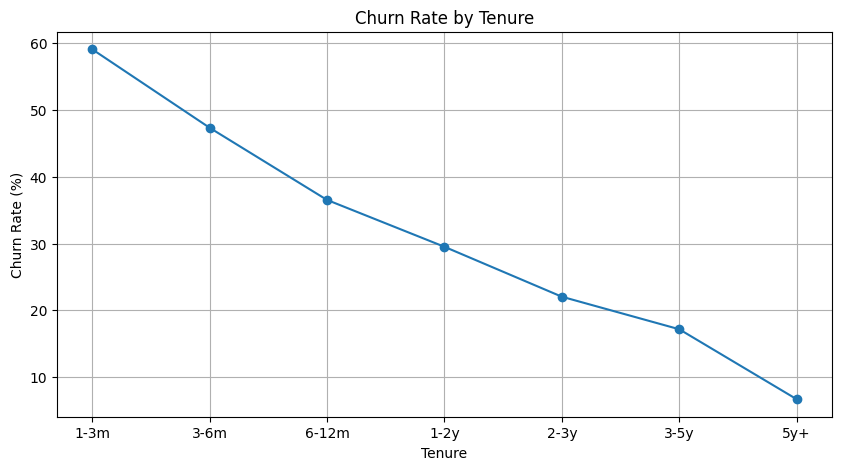

In [36]:
#Churn by tenure plot 
bins = [0, 1, 3, 6, 12, 24, 36, 60, 120]
labels = ['<1m', '1-3m', '3-6m', '6-12m', '1-2y', '2-3y', '3-5y', '5y+']

interconnect_merged['tenure_bin'] = pd.cut(
    interconnect_merged['tenure_months'], 
    bins=bins,
    labels=labels,
    right=False
)

churn_by_tenure = (
    interconnect_merged.groupby('tenure_bin')['churn'].mean() * 100
)

plt.figure(figsize=(10, 5))
churn_by_tenure.plot(marker='o')
plt.title('Churn Rate by Tenure')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Tenure')
plt.grid(True)
plt.show()

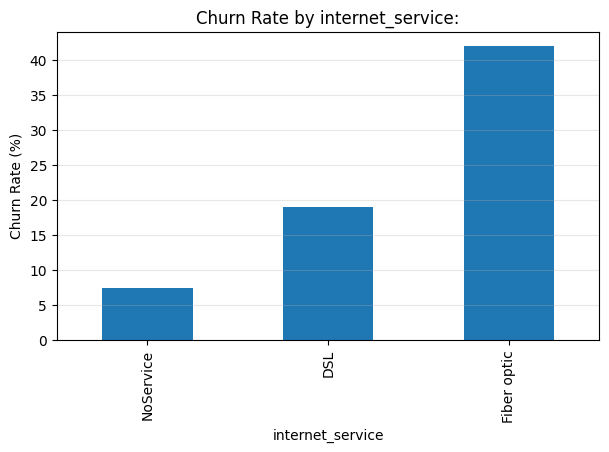

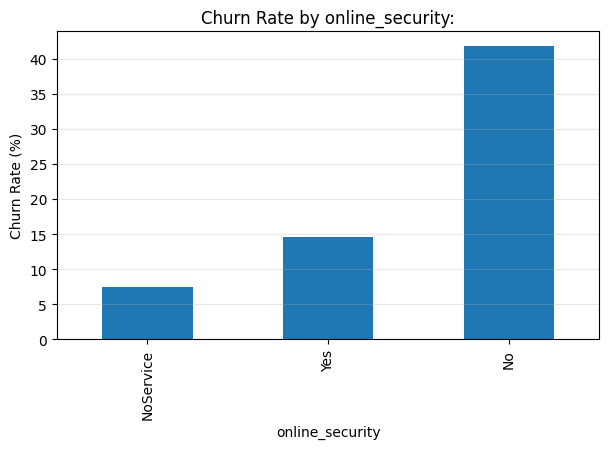

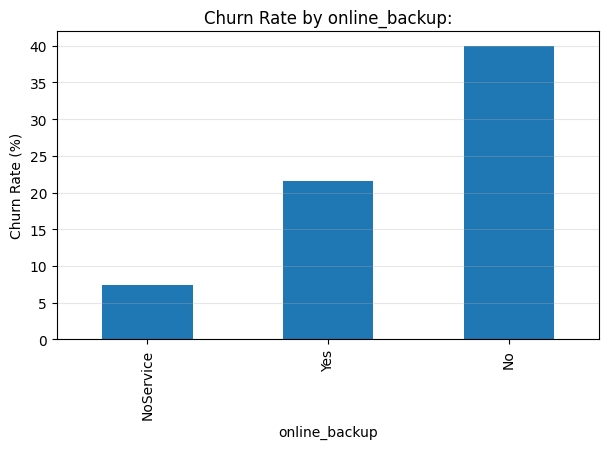

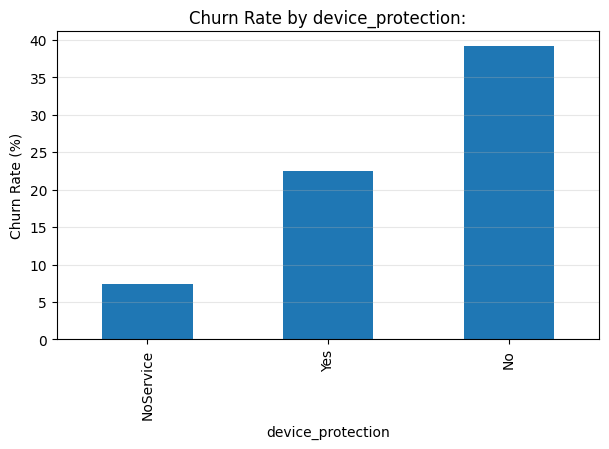

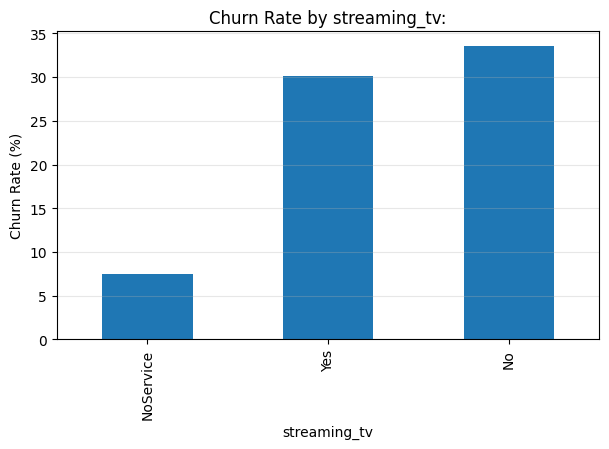

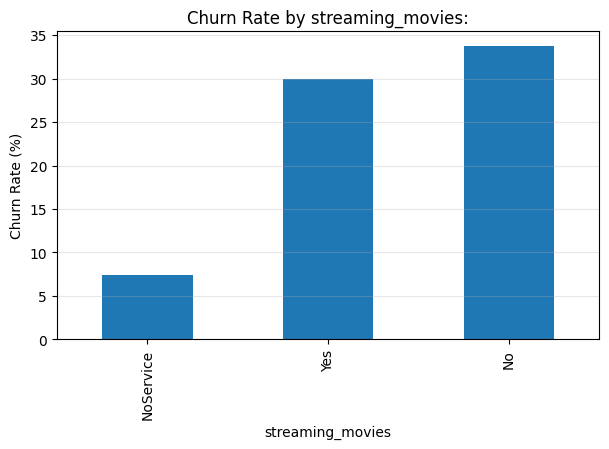

In [37]:
internet_services = [
    'internet_service', 
    'online_security',
    'online_backup', 
    'device_protection',
    'streaming_tv',
    'streaming_movies'
]
interconnect_merged
for service in internet_services:
    churn_rate_internet = (interconnect_merged.groupby(service)['churn'].mean() * 100).sort_values()

    plt.figure(figsize=(7, 4))
    churn_rate_internet.plot(kind='bar')
    plt.title(f'Churn Rate by {service}:')
    plt.xlabel(f'{service}')
    plt.ylabel('Churn Rate (%)')
    plt.grid(axis='y', alpha=0.3)
    plt.show()
    

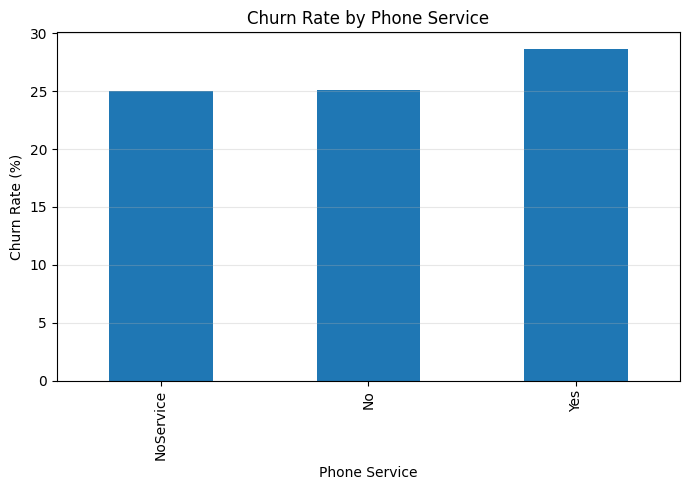

In [38]:
churn_rate_phone = (interconnect_merged.groupby('multiple_lines')['churn'].mean() * 100).sort_values()

plt.figure(figsize=(7, 5))
churn_rate_phone.plot(kind='bar')
plt.title('Churn Rate by Phone Service')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Phone Service')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

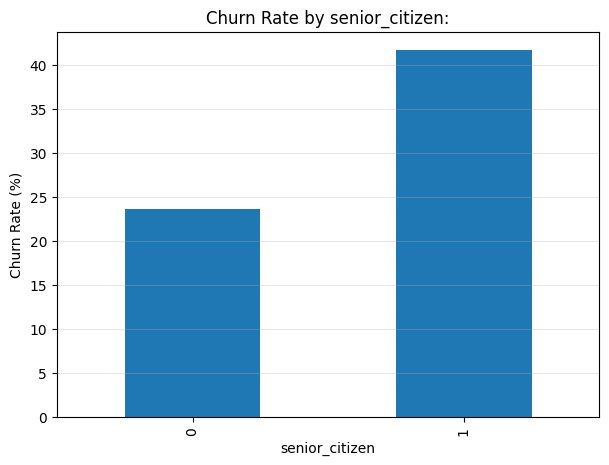

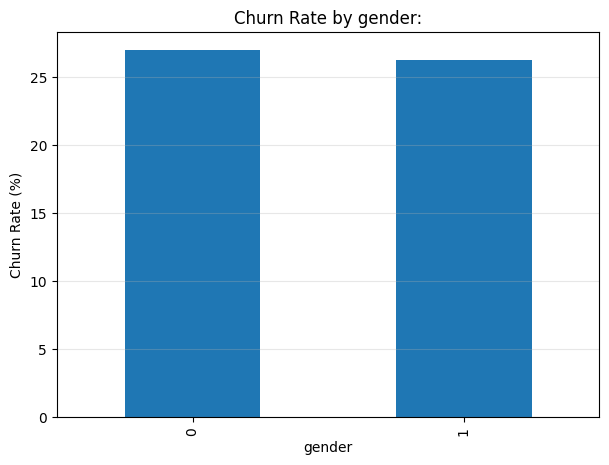

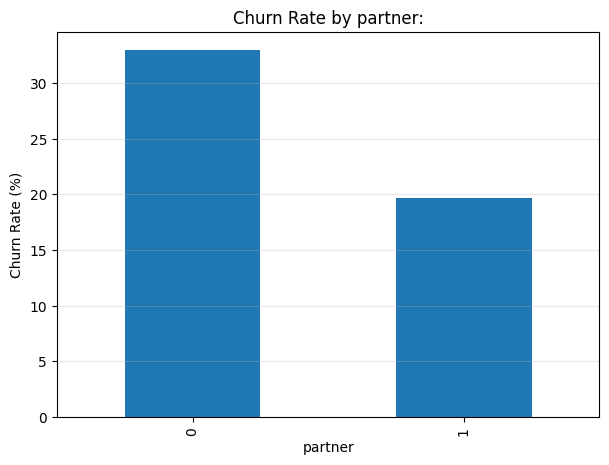

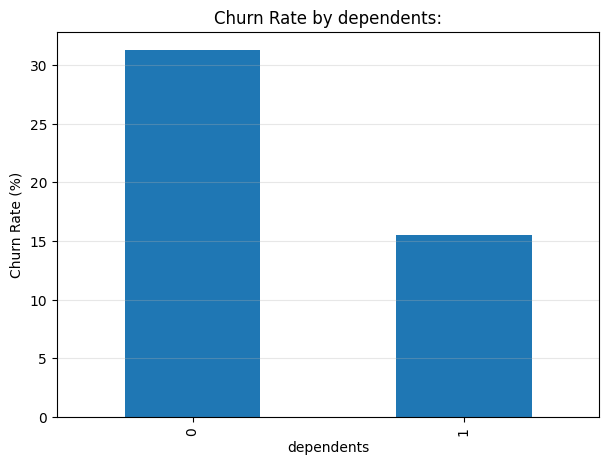

In [39]:
customer_demos = ['senior_citizen', 'gender', 'partner', 'dependents']

for col in customer_demos:
    churn_rate_demo = (interconnect_merged.groupby(col)['churn'].mean() * 100)
    
    plt.figure(figsize=(7, 5))
    churn_rate_demo.plot(kind='bar')
    plt.title(f'Churn Rate by {col}:')
    plt.xlabel(f'{col}')
    plt.ylabel('Churn Rate (%)')
    plt.grid(axis='y', alpha=0.3)
    plt.show()


**FINAL CONCLUSIONS ON KEY VISUALISATIONS:**
- Can see that the longer a client's tenure the less likely they are to churn. With the most amount of clien't who churn being enrolled with interconnect for fewer than <3 years. 
- Some other insights include: 
    - Fiber optic is the internet service that results in client's churning the most.
    - It is reconfirmed that client's who do not make use of the companies internet/streaming services are more likely to churn. 
    - People who make use of multi-line phone services are the most similar in churn rates between those who are enrolled and those who aren't. 
    - Churn rates across key demographics reconfirm that senior citizens are more likely to churn, genders churn in close to equal rates and those with dependents and partners are less likely to churn than those without. 

## Proposed Work Plan: ##
The overarching goal of the project is to create a model that can accurately predict whether or not a customer will remain with the service or if they're planning to leave Interconnect. If the prediction shows that the client will leave then promotional codes and special plans will be offered to them. Will be using ROC-AUC as the evaluation metric with accuracy being used as a secondary evaluation metric, may also include other metrics (precision, recall, F1 score) to ensure accurate gauge of optimal model performance. 

**The steps that I have performed up until this point include:** 

1) Downloading the data.
2) Explore data and determine best way to treat/optimise data during preprocessing.
3) Perform pre-processing:
    - Merging the data into one complete dataframe.
    - Changing column names by conforming to snake_case convention.
    - Convert columns to correct datatype.
4) Perform a more in depth EDA and create more plots for data visualisation and insight into both data and model training strategy.  
5) Feature engineering:
    - Categorical columns encoded with OHE for later model training. 
    - Create a tenure column for days/months that show how long a customer has been enrolled with the service
  
**The steps to be implemented from this point include:**
1) Train and test various classification models.
2) Tune Model hyperparameters and adjust feature engineering if necessary, then reevaluate 
3) Draw final conclusions/recommendations for model implementation for the company 

**Clarifying questions to be answered:**

1) Which customer segments churn the most? (Contract type, payment method, etc.)
2) How does tenure influence churn? 
3) Does pricing increase churn?
4) Can model seperate churners from non-churners well?
5) Which features influence predictions the most?
6) What happens when the model is wrong?

**NOTE:**

Some notes on evaluation metrics: 

*ROC-AUC:* 
- (Receiver Operating Characteristic-Area Under Curve) measures how well the model ranks churners above non-churners across all possible thresholds.
- Asks 'Does model give higher churn risk scores to customers who actually leave?'
- Uses predicted probabilities not hard labels.
- Threshold independent.
- Robust to class imbalance.

*Accuracy:*
- The proportion of correct predictions.
- Asks 'Out of all customers how did model label correctly as stay or churn?'.
- Works well when classes are balanced.

*How they work together*
- ROC-AUC answers if model is good at seperating churners from non-churners, used to: compare models, tune hyperparameters, decide whether model is worth deploying. 
- Accuracy answers if at a given threshold how many predictions are correct, used to: evaluate operational performance, compare different thresholds, balance business trade-offs.




## MODEL TRAINING: 

### Splitting Data: 

In [40]:
#split data using train_test_split
features = interconnect_merged.drop(columns=['customer_id', 'begin_date', 'end_date', 'tenure', 'tenure_bin', 'churn'])
target = interconnect_merged['churn']

features_train, features_val, target_train, target_val = train_test_split(
    features,
    target,
    test_size=0.25,
    stratify=target,
    random_state=246
)

In [41]:
#seperate split for encoded data
features_encoded = interconnect_encoded.drop(columns=['customer_id', 'begin_date', 'end_date', 'tenure'])
target_encoded = target

In [42]:
features_encoded_train, features_encoded_test, target_encoded_train, target_encoded_test = train_test_split(
    features_encoded,
    target_encoded, 
    test_size=0.25, 
    stratify=target_encoded,
    random_state=246
)

**NOTES ON DATA SPLIT:**

- Split the data on a 75%, 25% split (training/validation data).
- Created 2 splits one for raw data and one for OHE data. 
- Used to stratify to help with the imbalance of the target ('churn')

### Logistic Regression (baseline): 

In [43]:
log_reg = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    solver='liblinear', 
    random_state=246
)

log_reg.fit(features_encoded_train, target_encoded_train)

preds = log_reg.predict(features_encoded_test)
pred_proba = log_reg.predict_proba(features_encoded_test)[:, 1]

accuracy = accuracy_score(target_encoded_test, preds)
roc_auc = roc_auc_score(target_encoded_test, pred_proba)

print(f'Accuracy Score: {accuracy}')
print(f'ROC-AUC: {roc_auc}')

Accuracy Score: 0.7605233219567691
ROC-AUC: 0.8664332381816464


**NOTES ON BASELINE MODEL:**
- Used logistic regression for the baseline model.
- Model performed very well all things considered (indicates good split/preprocessing)
- Ideally want to reach company goal of roc-auc > 90 so we can rule logistic regression out in final evaluation.
- Good to see how data performs with a simple model and the high roc-auc score indicates that more complicated classification models (gradient boost models) will perform better than the simpler logistic regression.

### XGBoost: 

In [44]:
xgbc = XGBClassifier(
    n_estimators=500, 
    learning_rate=0.05,
    max_depth=4,
    scale_pos_weight=target_encoded_train.value_counts()[0] / target_encoded_train.value_counts()[1],
    random_state=246
)
xgbc.fit(features_encoded_train, target_encoded_train)

preds = xgbc.predict(features_encoded_test)
pred_proba = xgbc.predict_proba(features_encoded_test)[:, 1]

print(f'Accuracy: {accuracy_score(target_encoded_test, preds)}')
print(f'ROC-AUC: {roc_auc_score(target_encoded_test, pred_proba)}')

Accuracy: 0.8088737201365188
ROC-AUC: 0.9002847915979014


### CatBoostClassifier: ###

In [45]:
cat_features = [
    'type', 'payment_method', 'internet_service', 'online_security',
    'online_backup', 'device_protection', 'tech_support',
    'streaming_tv', 'streaming_movies', 'multiple_lines'
]

In [46]:
train_pool = Pool(data=features_train, label=target_train, cat_features=cat_features)
val_pool = Pool(data=features_val, label=target_val, cat_features=cat_features)

In [47]:
cb = CatBoostClassifier(
    iterations=500, 
    learning_rate=0.05,
    depth=6,
    random_seed=246
)

cb.fit(
    train_pool,
    eval_set=val_pool,
    use_best_model=True,
    early_stopping_rounds=50,
    verbose=0
)
preds = cb.predict(features_val)
pred_proba = cb.predict_proba(features_val)[:, 1]

print(f'Accuracy: {accuracy_score(target_val, preds)}')
print(f'ROC-AUC: {roc_auc_score(target_val, pred_proba)}')

Accuracy: 0.8458475540386803
ROC-AUC: 0.8956845033231216


### LGBM Classifier:

In [48]:
lgbm = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    objective='binary',
    max_depth=8,
    random_state=246
)
lgbm.fit(
    features_encoded_train,
    target_encoded_train,
    eval_set=[(features_encoded_test, target_encoded_test)],
    eval_metric=['accuracy', 'auc']
)
preds = lgbm.predict(features_encoded_test)
pred_proba = lgbm.predict_proba(features_encoded_test)[:, 1]

print(f'Accuracy: {accuracy_score(target_encoded_test, preds)}')
print(f'ROC-AUC: {roc_auc_score(target_encoded_test, pred_proba)}')


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1402, number of negative: 3872
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000644 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 5274, number of used features: 29
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265832 -> initscore=-1.015871
[LightGBM] [Info] Start training from score -1.015871
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

**NOTES ON GRADIENT BOOSTING MODELS:**

***XGBoost Model***
- The XGBoost model performed fantastically and with minimal hyperparameter tuning acheived a ROC-AUC score >= 90. It did have a slightly lower accuracy around 80% which is still decent given the company goal of determining churn rate. **(ROC-AUC measures how well the model rank's positive instances over negative one's, considering the imbalance of churners vs. non-churners this is the far more important metric)**
- Will test more in depth later (with hyperparamters/more involved feature engineering) to see if we can attain an even better ROC-AUC score.
- Need to test LGBM model and CatBoost to determine the best model in final evaluation.

***CatBoostClassifier:***
- Performed very well marginally worse than the XGBoost model (final ROC-AUC 0.89 compared to 0.90).
- Did score better on accuracy  (0.84 compared to 0.80).
- Model gives positive values slightly less weight than the XGBoost model but is more accurate in predicting correct answers. 
- More in depth hyperparameter tuning needed to determine best model for final evaluation.

***LightGBM Model:***
- Performed the worst in terms of ROC-AUC but only slightly (initial score around 0.88)
- More accurate than the XGBoost model but less accurate than the CatBoost model (0.83 compared to 0.84 (CatBoost), 0.80 (XGBoost)).
- Very comparable to the others, need to determine after hyperparameter tuning which model would be best suited for final testing and eventual implementation. 

### Hyperparameter Tuning: ###

In [49]:
#code for suppressing some of the unecessary output from LGBM, CatBoost and XGBoost for readibility 
@contextmanager
def suppress_output():
     with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        old_stderr = sys.stderr
        sys.stdout = devnull
        sys.stderr = devnull
        try:
            yield
        finally:
            sys.stdout = old_stdout
            sys.stderr = old_stderr

In [50]:
#for loop for hyperparameter tuning for all gradient boosting models 
models = {
    'XGBoost': {
        'estimator': xgb.XGBClassifier(
            objective='binary:logistic',
            eval_metric='auc',
            use_label_encoder=False,
            verbose=0,
            random_state=246
        ),
        'param_dist': {
            'n_estimators': [200, 500, 700],
            'learning_rate': [0.01, 0.05, 0.1],
            'max_depth': [4, 6, 8],
            'subsample': [0.6, 0.8, 1.0],
            'colsample_bytree': [0.6, 0.8, 1.0],
            'scale_pos_weight': [target_train.value_counts()[0]/target_train.value_counts()[1]]
        }
    },
    'LightGBM': {
        'estimator': lgb.LGBMClassifier(
            n_estimators=1000,
            objective='binary', 
            random_state=246,
            verbose=-1
        ),
        'param_dist': {
            'num_leaves': [15, 31, 63],
            'max_depth': [4, 6, 8],
            'learning_rate': [0.01, 0.05, 0.1],
            'subsample': [0.6, 0.8, 1.0],
            'colsample_bytree': [0.6, 0.8, 1.0],
            'reg_alpha': [0, 0.1, 0.5],
            'reg_lambda': [0, 0.1, 0.5]
        }
    },
    'CatBoost': {
        'estimator': CatBoostClassifier(
            iterations=1000,
            eval_metric='AUC', 
            random_seed=246,
            verbose=0
        ),
        'param_dist': {
            'depth': [4, 6, 8, 10],
            'learning_rate': [0.01, 0.05, 0.1], 
            'l2_leaf_reg': [1, 3, 5, 7],
            'border_count': [32, 64, 128]
        }
    }
}

results = {}

for name, model_info in models.items():
    print(f'\n**** Tuning {name} ****')

    if name == 'XGBoost':
        search = RandomizedSearchCV(
            estimator=model_info['estimator'],
            param_distributions=model_info['param_dist'],
            n_iter=20,
            scoring='roc_auc',
            cv=3,
            random_state=246, 
            verbose=0,
            n_jobs=-1
        )
        with suppress_output():
            search.fit(features_encoded_train, target_encoded_train,
                    **{'eval_set': [(features_encoded_test, target_encoded_test)]})
        
    
    elif name == 'LightGBM':
        search = RandomizedSearchCV(
            estimator=model_info['estimator'],
            param_distributions=model_info['param_dist'],
            n_iter=20,
            scoring='roc_auc',
            cv=3,
            random_state=246,
            verbose=False,
            n_jobs=-1
        )
        with suppress_output():
            search.fit(features_encoded_train, target_encoded_train, 
                       **{'eval_set': [(features_encoded_test, target_encoded_test)], 'eval_metric': 'auc'})
    
    elif name == 'CatBoost':
        best_auc = 0
        best_accuracy = 0 
        best_params = None

        for i in range(20):
            params = {k: random.choice(v) for k, v in model_info['param_dist'].items()}
            model = CatBoostClassifier(
                iterations=1000,
                eval_metric='AUC',
                random_seed=246,
                verbose=0,
                **params
            )
            with suppress_output():
                model.fit(X=features_train, y=target_train, cat_features=cat_features,
                         eval_set=(features_val, target_val), use_best_model=True, early_stopping_rounds=5)
            
            pred_proba = model.predict_proba(features_val)[:, 1]
            preds = model.predict(features_val)
            auc = roc_auc_score(target_val, pred_proba)
            accuracy = accuracy_score(target_val, preds)

            if auc > best_auc:
                best_auc = auc
                best_params = params
                best_model = model

            if accuracy > best_accuracy:
                best_accuracy = accuracy
        
        results[name] = {'Best Params': best_params, 'Accuracy': best_accuracy, 'ROC-AUC': best_auc}
        print(f'Best Accuracy for {name}: {best_accuracy}')
        print(f'Best ROC-AUC for {name}: {best_auc}')
        print(f'Best Parameters: {best_params}')
        continue
    
    best_model = search.best_estimator_
    pred_proba = best_model.predict_proba(features_encoded_test)[:, 1]
    preds = best_model.predict(features_encoded_test)
    auc_score = roc_auc_score(target_encoded_test, pred_proba)
    accuracy = accuracy_score(target_encoded_test, preds)

    print(f'Best Accuracy for {name}: {accuracy}')
    print(f'Best ROC-AUC for {name}: {auc_score}')
    print(f'Best Parameters: {name}: {search.best_params_}')




**** Tuning XGBoost ****
Best Accuracy for XGBoost: 0.8145620022753128
Best ROC-AUC for XGBoost: 0.9009797693470029
Best Parameters: XGBoost: {'subsample': 1.0, 'scale_pos_weight': np.float64(2.761768901569187), 'n_estimators': 700, 'max_depth': 4, 'learning_rate': 0.05, 'colsample_bytree': 0.8}

**** Tuning LightGBM ****
Best Accuracy for LightGBM: 0.8361774744027304
Best ROC-AUC for LightGBM: 0.8939097391428387
Best Parameters: LightGBM: {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alpha': 0.5, 'num_leaves': 15, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 0.6}

**** Tuning CatBoost ****
Best Accuracy for CatBoost: 0.8213879408418657
Best ROC-AUC for CatBoost: 0.8782072227926163
Best Parameters: {'depth': 10, 'learning_rate': 0.05, 'l2_leaf_reg': 1, 'border_count': 128}


**CONCLUSIONS FOR HYPERPARAMETER TUNING:**

- The improvements are marginal with a slight regression in accuracy for LGBM and CatBoost with ROC-AUC remaining practically the same.
- There is a notable improvement in the accuracy of XGBoost with optimised hyperparameters with it moving nearly 2% points up. 
- All 3 models would be good candidates for final testing/implementation but the increase in accuracy plus the relatively low runtime of the XGBoost model makes it the best candidate in the final analysis. 
- Will be focusing on this going forward and working to make the most accurate and best predicting XGBoost model for ROC-AUC through more in depth feature engineering and splitting the data once more. 

### Further Feature Engineering: ###

In [51]:
#adding interactive features to interconnect_merged dataframe

#categorical interactions
interconnect_merged['service_security_combo'] = features['internet_service'] + '_' + features['online_security']
interconnect_merged['contract_payment_combo'] = features['type'] + '_' + features['payment_method']
interconnect_merged['lines_service_combo'] = features['multiple_lines'] + '_' + features['internet_service']
interconnect_merged['streaming_combo'] = features['streaming_movies'] + features['streaming_tv'] 

#numerical interactions
interconnect_merged['avg_charges_per_tenure_months'] = interconnect_merged['total_charges'] / (interconnect_merged['tenure_months'] + 1)
interconnect_merged['monthly_charges_by_tenure_months'] = interconnect_merged['tenure_months'] * interconnect_merged['monthly_charges']

#numerical/categorical interactions: 
interconnect_merged['senior_monthly'] = interconnect_merged['monthly_charges'] * interconnect_merged['senior_citizen']
interconnect_merged['partner_monthly'] = interconnect_merged['monthly_charges'] * interconnect_merged['partner']
interconnect_merged['dependents_monthly'] = interconnect_merged['monthly_charges'] * interconnect_merged['dependents']

interconnect_merged.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,...,tenure_bin,service_security_combo,contract_payment_combo,lines_service_combo,streaming_combo,avg_charges_per_tenure_months,monthly_charges_by_tenure_months,senior_monthly,partner_monthly,dependents_monthly
0,0002-ORFBO,2019-05-01,NaT,One year,1,Mailed check,65.6,593.30,DSL,No,...,6-12m,DSL_No,One year_Mailed check,No_DSL,NoYes,58.166667,603.52,0.0,65.6,65.6
1,0003-MKNFE,2019-05-01,NaT,Month-to-month,0,Mailed check,59.9,542.40,DSL,No,...,6-12m,DSL_No,Month-to-month_Mailed check,Yes_DSL,YesNo,53.176471,551.08,0.0,0.0,0.0
2,0004-TLHLJ,2019-09-01,2020-01-01,Month-to-month,1,Electronic check,73.9,280.85,Fiber optic,No,...,3-6m,Fiber optic_No,Month-to-month_Electronic check,No_Fiber optic,NoNo,55.068627,302.99,0.0,0.0,0.0
3,0011-IGKFF,2018-12-01,2020-01-01,Month-to-month,1,Electronic check,98.0,1237.85,Fiber optic,No,...,1-2y,Fiber optic_No,Month-to-month_Electronic check,No_Fiber optic,YesYes,87.172535,1293.60,98.0,98.0,0.0
4,0013-EXCHZ,2019-09-01,2019-12-01,Month-to-month,1,Mailed check,83.9,267.40,Fiber optic,No,...,3-6m,Fiber optic_No,Month-to-month_Mailed check,No_Fiber optic,NoYes,66.850000,251.70,83.9,83.9,0.0


In [52]:
#creating new encoded dataframe for final analysis
new_ohe_df = interconnect_merged.drop(columns=['churn'])
new_ohe_df = pd.get_dummies(new_ohe_df, columns=ohe_cols, drop_first=True)
new_ohe_df.head(2)

,customer_id,begin_date,end_date,paperless_billing,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,...,device_protection_NoService,device_protection_Yes,tech_support_NoService,tech_support_Yes,streaming_tv_NoService,streaming_tv_Yes,streaming_movies_NoService,streaming_movies_Yes,multiple_lines_NoService,multiple_lines_Yes
0,0002-ORFBO,2019-05-01,NaT,1,65.6,593.3,0,0,1,1,...,False,False,False,True,False,True,False,False,False,False
1,0003-MKNFE,2019-05-01,NaT,0,59.9,542.4,1,0,0,0,...,False,False,False,False,False,False,False,True,False,True


In [53]:
#splitting encoded data
features_ohe = new_ohe_df.drop(columns=['customer_id', 'begin_date', 'end_date', 'tenure', 'tenure_bin'])
target = interconnect_merged['churn']

features_ohe_train, features_ohe_test, target_ohe_train, target_ohe_test = train_test_split(
    features_ohe, target, test_size=0.25, stratify=target, random_state=246
)

In [54]:
#dropping redundant features for final training 
ohe_dfs = [features_ohe, features_ohe_train, features_ohe_test]
cols_to_drop = [
    'type',
    'payment_method',
    'internet_service',
    'online_security',
    'online_backup',
    'device_protection',
    'tech_support',
    'streaming_tv',
    'streaming_movies',
    'multiple_lines',
]
for df in ohe_dfs:
        for col in cols_to_drop:
                if col in df.columns:
                       df.drop(columns=[col], inplace=True)
        
        print(df.columns.tolist())


['paperless_billing', 'monthly_charges', 'total_charges', 'gender', 'senior_citizen', 'partner', 'dependents', 'tenure_months', 'service_security_combo', 'contract_payment_combo', 'lines_service_combo', 'streaming_combo', 'avg_charges_per_tenure_months', 'monthly_charges_by_tenure_months', 'senior_monthly', 'partner_monthly', 'dependents_monthly', 'type_One year', 'type_Two year', 'payment_method_Credit card (automatic)', 'payment_method_Electronic check', 'payment_method_Mailed check', 'internet_service_Fiber optic', 'internet_service_NoService', 'online_security_NoService', 'online_security_Yes', 'online_backup_NoService', 'online_backup_Yes', 'device_protection_NoService', 'device_protection_Yes', 'tech_support_NoService', 'tech_support_Yes', 'streaming_tv_NoService', 'streaming_tv_Yes', 'streaming_movies_NoService', 'streaming_movies_Yes', 'multiple_lines_NoService', 'multiple_lines_Yes']
['paperless_billing', 'monthly_charges', 'total_charges', 'gender', 'senior_citizen', 'partner

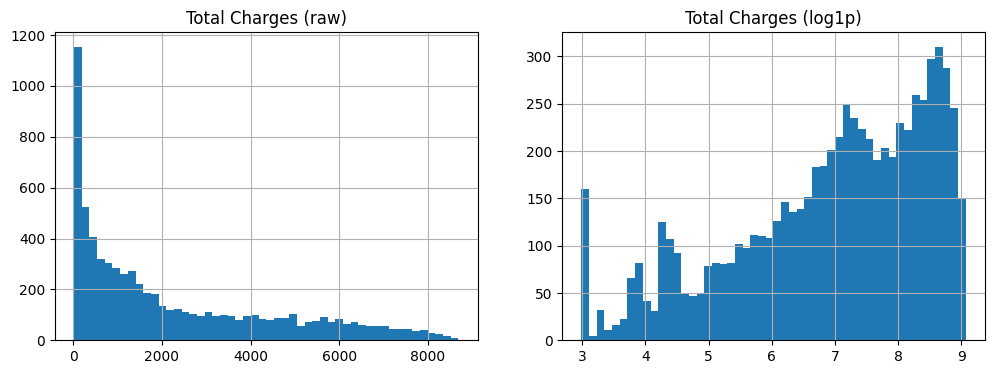

In [55]:
#checking if total_charges are skewed and determining if logging is necessary
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

features_ohe['total_charges'].hist(bins=50, ax=ax[0])
ax[0].set_title('Total Charges (raw)')

np.log1p(features['total_charges']).hist(bins=50, ax=ax[1])
ax[1].set_title('Total Charges (log1p)')
plt.show()

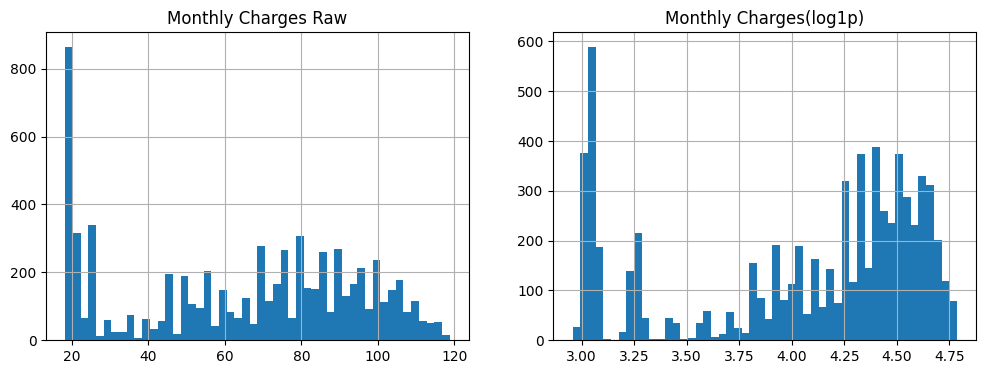

In [56]:
#checking if monthly_charges are skewed and require logging 
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

features_ohe['monthly_charges'].hist(bins=50, ax=ax[0])
ax[0].set_title('Monthly Charges Raw')

np.log1p(features['monthly_charges']).hist(bins=50, ax=ax[1])
ax[1].set_title('Monthly Charges(log1p)')
plt.show()

In [57]:
#logging total charges to compress outliers
for df in ohe_dfs: 
    df['log_total_charges'] = np.log1p(df['total_charges'])
    df.drop(columns=['total_charges'], inplace=True)
    print(df.columns.tolist())

features_ohe.head()

['paperless_billing', 'monthly_charges', 'gender', 'senior_citizen', 'partner', 'dependents', 'tenure_months', 'service_security_combo', 'contract_payment_combo', 'lines_service_combo', 'streaming_combo', 'avg_charges_per_tenure_months', 'monthly_charges_by_tenure_months', 'senior_monthly', 'partner_monthly', 'dependents_monthly', 'type_One year', 'type_Two year', 'payment_method_Credit card (automatic)', 'payment_method_Electronic check', 'payment_method_Mailed check', 'internet_service_Fiber optic', 'internet_service_NoService', 'online_security_NoService', 'online_security_Yes', 'online_backup_NoService', 'online_backup_Yes', 'device_protection_NoService', 'device_protection_Yes', 'tech_support_NoService', 'tech_support_Yes', 'streaming_tv_NoService', 'streaming_tv_Yes', 'streaming_movies_NoService', 'streaming_movies_Yes', 'multiple_lines_NoService', 'multiple_lines_Yes', 'log_total_charges']
['paperless_billing', 'monthly_charges', 'gender', 'senior_citizen', 'partner', 'dependent

,paperless_billing,monthly_charges,gender,senior_citizen,partner,dependents,tenure_months,service_security_combo,contract_payment_combo,lines_service_combo,...,device_protection_Yes,tech_support_NoService,tech_support_Yes,streaming_tv_NoService,streaming_tv_Yes,streaming_movies_NoService,streaming_movies_Yes,multiple_lines_NoService,multiple_lines_Yes,log_total_charges
0,1,65.6,0,0,1,1,9.2,DSL_No,One year_Mailed check,No_DSL,...,False,False,True,False,True,False,False,False,False,6.387384
1,0,59.9,1,0,0,0,9.2,DSL_No,Month-to-month_Mailed check,Yes_DSL,...,False,False,False,False,False,False,True,False,True,6.297846
2,1,73.9,1,0,0,0,4.1,Fiber optic_No,Month-to-month_Electronic check,No_Fiber optic,...,True,False,False,False,False,False,False,False,False,5.641375
3,1,98.0,1,1,1,0,13.2,Fiber optic_No,Month-to-month_Electronic check,No_Fiber optic,...,True,False,False,False,True,False,True,False,False,7.121939
4,1,83.9,0,1,1,0,3.0,Fiber optic_No,Month-to-month_Mailed check,No_Fiber optic,...,False,False,True,False,True,False,False,False,False,5.592478


**CONCLUSIONS OF FURTHER FEATURE ENGINEERING:**

- Opted to add interactive features to the data (shows relationships between different variables e.g. if a client uses internet services and cyber security simultaneously or not) helps model identifiy subtle variables between features.
- Used OHE as we're using a XGBoost model for final analysis (can't encode by itself).
- Dropped redundant columns after OHE.
- Log transformed the total_charges column to compress extreme values and bring values closer together; the data was incredibly skewed and this will help to stabilise variance.


### Final Model: 

In [58]:
cat_cols = [
    'service_security_combo', 
    'contract_payment_combo', 
    'lines_service_combo', 
    'streaming_combo'
]
for col in cat_cols:
    features_ohe_train[col] = features_ohe_train[col].astype('category')
    features_ohe_test[col] = features_ohe_test[col].astype('category')

    

In [59]:
final_xgb = XGBClassifier(
        objective='binary:logistic',
        n_estimators=300,
        learning_rate=0.08,
        max_depth=4,
        subsample=1.0,
        colsample_bytree=0.6,
        min_child_weight=0.1,
        max_delta_step=2,
        alpha=0.5,
        scale_pos_weight=2.76,
        enable_categorical=True,
        random_state=246
)
final_xgb.fit(features_ohe_train, target_ohe_train)

preds = final_xgb.predict(features_ohe_test)
pred_proba = final_xgb.predict_proba(features_ohe_test)[:, 1]

print(f'Acccuracy: {accuracy_score(target_ohe_test, preds)} \nROC-AUC: {roc_auc_score(target_ohe_test, pred_proba)}')

Acccuracy: 0.8094425483503982 
ROC-AUC: 0.9007616558052205


***NOTES ON FINAL MODEL:**
- Used XGBoost and fine tuned hyperparameters as much as possible.
- Acheived Interconnect's model training goal of ROC-AUC score >= 90, while maintaining a high accuracy.
- This would be a strong candidate for prediciting whether or not a client will churn or not over time. 

## Conclusions and Final Report for Customer Churn Prediction: ##

1) Project Goal: 

    The objective of the project was to create a model that predicts the likleyhood of a customer churning from Interconnect's services (cancel phone/internet services). With the company goal being to train model with a ROC-AUC >= 90 (meaning it ranks customers who have churned (1; a positive instance) higher than one who hasn't (0, negative instance)).

    Accurate churn prediction allows the business to: 
    - Proactively retain customers at risk of leaving (offer discounts/promotional offers, etc.)
    - Improve revenue over time (higher retention = more money)
    - Reduce client acquisition costs (more expensive to get new clients than retain clients already enrolled)

    This is a binary classification problem where '1' means a customer churned and '0' means a customer is still with Interconnect. 

2) Data Overview: 

    The dataset contains all client info including:

    **Key Feature Groups:** 
    - Customer Demographics: gender, senior citizenship status, dependent, etc. 
    - Account Info: Whether a client has churned or not, contract types, payment method.
    - Service Usage: If a client is enrolled in phone, internet, streaming, cloud storage, antivirus/malware protection services.
    - Billing Info: Monthly/total charges

    **Target Variable:**
    - Churn rate (attained from end_date column)

    **Initial Obervations:**

    ***Data:***
    - The data was split into 4 seperate dataframes and needed to be merged into one main one. 
    - Target feature was unbalanced (majority of people still with Interconnect in some capacity)
    - One-hot encoding needed for some features.
    - Some numerical features are skewed. 

    ***Data Observations:***
    - People who didn't make use of additional services (streaming, cloud storage, device protection, tech support, etc.) were more likely to churn than those who did.
    - People who pay higher monthly premiums are more at risk of churning and typically leave the company early. This is reflected in tenure length those who pay the most in total are with the company the longest. 
    - Fiber optic is the most likely internet service to churn. 
    - Senior citizens are more likely to churn. 
    - Client's with dependents/partners are less likely to churn. 

3) Data Preprocessing, Work Plan Implementation and Model Training: 

    **EDA:**
    - Merging columns together.
    - Checked data quality and edited data types and format accordingly
    - Checked missing/duplicate values post merge.
    - Standardised binary categorical values.
    - Statistically summarised numerical/categorical features.
    - Analysed class balance (Churn Rate)
    - Univariate analysis of numerical/categorical features, identified outliers.
    - Bivariate analysis; explored relationships between features/target, created necessary visualisations.
    - Implemented preliminary feature engineering (basic encoding establishing tenure).
    - Visualistion of key insights; churn rate by tenure (time with company), service usage and demographic analysis.
    - Created work plan for model training testing. 
    - ***All of the above were discussed and implemented in model training and preprocessing***

    **Data Split:**
    - Removed columns that will cause leakage (customer_id, begin/end date, tenure, churn)
    - Split encoded data in the same way. 

    **Baseline Model and Initial Model Training:**
    - Created baseline model (LogisticRegression) and established baseline results.
    - Implemented various boosting models (XGBoost, LighGBM, CatBoost) and reached the company goal of ROC-AUC >= 90.
    - Opted for additional, hyperparameter tuning/feature engineering (Adding interactive features).

    **Hyperparameter Tuning, Additional Feature Engineering:**
    - Added interactive features categorical interactions (e.g. internet service/online security usage), numerical interactions (e.g. avg charges by tenure months), categorical/numerical interactions (e.g. monthly charges by senior citizenship status). Allows model to see subtle interactions between features.
    - Used RandomizedSearch() to find optimal hyperparameters for final model (best performing was XGBoost)
    - Performed new OHE with interactive columns added (dropped redundant columns).
    - Used logging to compress outliers and bring values closer together in total charges as the data was skewed, help to stabilise variance
    
    **Final Model Training:**
    - Used XGBoost for final training/analysis. 
    - Fine tuned hyperparameters as much as possible. 
    - Acheived final ROC-AUC score of 90 meeting company goal and a high accuracy of 81%. 

### Final Conclusions: ###

To acheive the final ROC-AUC result matching the company guidlines:
- Implemented the work plan laid out after the EDA.
- Had to adjust hyperparameters and include in depth feature engineering to meet the final ROC-AUC score of 90. These were key in ensuring the best possible model for company implementation. 

In the final analysis the final XGBoost model is well worth Interconnect's time and would be a great fit for determining the likleyhood a customer will churn or not. It weighs those who have churned greater than those who haven't (evident from high ROC-AUC) while still remaining extremely accurate (accuracy = 81%). I have full confidence that this model would be up to the task and can help to catch high risk client's before they've churned. Ultimately ensuring a higher revenue stream and customer retention rate. 

